In [1]:
!pip freeze |grep pandas-profiling

'grep' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip install pip-autoremove
!pip-autoremove pandas-profiling[notebook] -y
!pip install pandas-profiling
!pip install ppscore
!pip install imblearn

Traceback (most recent call last):
  File "c:\users\phani ullamgunta\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\phani ullamgunta\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Phani Ullamgunta\anaconda3\Scripts\pip-autoremove.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip_autoremove'


  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ppscore 1.2.0 requires scikit-learn<1.0.0,>=0.20.2, but you have scikit-learn 1.0.2 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import pandas_profiling as pp1
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest,RandomForestClassifier
import ppscore as pps
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE,SelectFromModel,mutual_info_classif,SelectKBest,chi2,f_classif
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import Lasso,LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_curve,roc_auc_score,f1_score,recall_score,precision_score
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df = pd.read_csv('P:/Project/final folder/incident_event_log.csv')
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [5]:
df.incident_state.unique()
#'-100' in df.incident_state.unique()

array(['New', 'Resolved', 'Closed', 'Active', 'Awaiting User Info',
       'Awaiting Problem', 'Awaiting Vendor', 'Awaiting Evidence', '-100'],
      dtype=object)

In [6]:
#As we can see ? and -100 appeared in the df which are nothing but missing values and it may hinder our further analysis.
missing_Values = ['?','-100']
df = pd.read_csv('P:/Project/final folder/incident_event_log.csv',na_values = missing_Values)
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [7]:
#pp.ProfileReport(df).to_file('output.html')

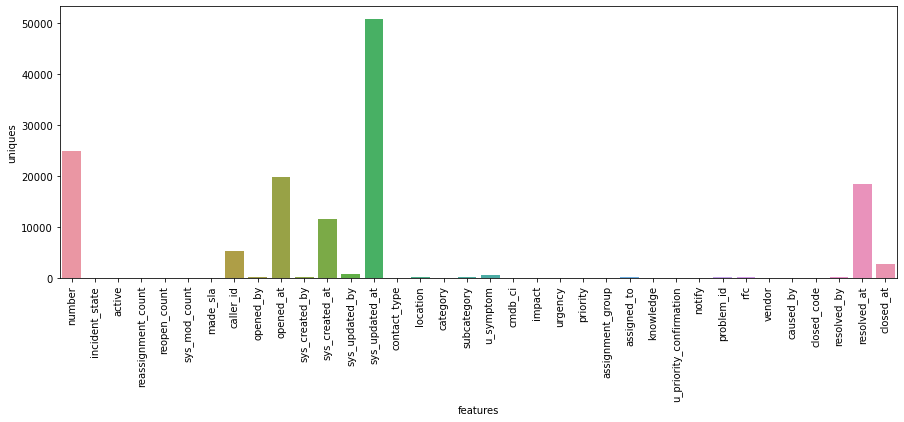

In [8]:
#Plot of unique value of each features
df_unq = df.nunique().reset_index()
df_unq.columns = ['features', 'uniques']
fig, axes = plt.subplots(figsize=(15,5))
plot = sns.barplot(x='features', y='uniques', data=df_unq)
plot.tick_params(axis='x', rotation=90)

In [9]:
print('Shape of DataFrame ',df.shape,' \n Size of DataFrame', df.size)
print('\n \n--------*******************************************--------')
print('\n Duplicat Rows in DataFrame', df.duplicated().sum())#or use isnull
print('\n \n--------*******************************************--------')
print('\n Total No. of Missing Values', df.isna().sum().sum())
print('\n \n--------*******************************************--------')
print('\n No. of Missing Values for each feature \n\n', df.isna().sum())
print('\n \n--------*******************************************--------')
print('\n ===Data Types of the DataSet=== \n\n', df.dtypes)#Identification of data types
print('\n \n--------*******************************************--------')


Shape of DataFrame  (141712, 36)  
 Size of DataFrame 5101632

 
--------*******************************************--------

 Duplicat Rows in DataFrame 0

 
--------*******************************************--------

 Total No. of Missing Values 894602

 
--------*******************************************--------

 No. of Missing Values for each feature 

 number                          0
incident_state                  5
active                          0
reassignment_count              0
reopen_count                    0
sys_mod_count                   0
made_sla                        0
caller_id                      29
opened_by                    4835
opened_at                       0
sys_created_by              53076
sys_created_at              53076
sys_updated_by                  0
sys_updated_at                  0
contact_type                    0
location                       76
category                       78
subcategory                   111
u_symptom                

In [10]:
#Descriptive Statistic
#For numerical parameters, fields like mean, std deviation, percentiles, and maximum have been populated.
#For categorical features, count, un1ique, top (most frequent value), and corresponding frequency have been populated. This gives us a broad idea of our dataset.
df.describe(include='all')

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
count,141712,141707,141712,141712.000000,141712.000000,141712.000000,141712,141683,136877,141712,...,141712,141712,2295,991,244,23,140998,141486,138571,141712
unique,24918,8,2,NaN,NaN,NaN,2,5244,207,19849,...,2,2,252,181,4,3,17,216,18505,2707
top,INC0019396,Active,True,NaN,NaN,NaN,True,Caller 1904,Opened by 17,14/4/2016 20:42,...,False,Do Not Notify,Problem ID 14,CHG0000132,code 8s,CHG0000097,code 6,Resolved by 15,3/6/2016 16:29,24/3/2016 18:59
freq,58,38716,116726,NaN,NaN,NaN,132497,1425,41466,58,...,100740,141593,184,20,167,11,86583,15421,93,3324
mean,NaN,NaN,NaN,1.104197,0.021918,5.080946,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.734673,0.207302,7.680652,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,0.000000,3.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#% of NA values of each feature
df_missingValues = pd.DataFrame(df.isna().sum()).reset_index()
df_missingValues.columns=['feature','MissingValues']
df_missingValues['df_missingValues_Percentage'] = (df_missingValues.MissingValues/len(df))*100
#df_missingValues['df_missingValues_Percentage'] = df_missingValues.MissingValues.apply(lambda x: round((x/len(incident_df1))*100))
df_missingValues

,feature,MissingValues,df_missingValues_Percentage
0,number,0,0.000000
1,incident_state,5,0.003528
2,active,0,0.000000
3,reassignment_count,0,0.000000
4,reopen_count,0,0.000000
5,sys_mod_count,0,0.000000
6,made_sla,0,0.000000
7,caller_id,29,0.020464
8,opened_by,4835,3.411849
9,opened_at,0,0.000000


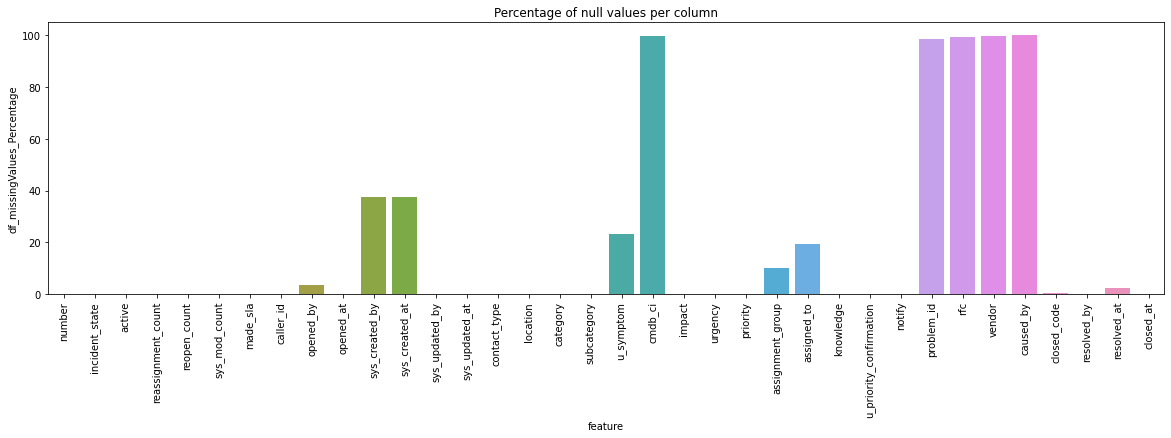

In [12]:
#Missing value percentage plot
fig,ax = plt.subplots(figsize=(20,5))
sns.barplot(x='feature',y='df_missingValues_Percentage',data = df_missingValues).tick_params(axis='x', rotation=90)
plt.title('Percentage of null values per column')
plt.show()


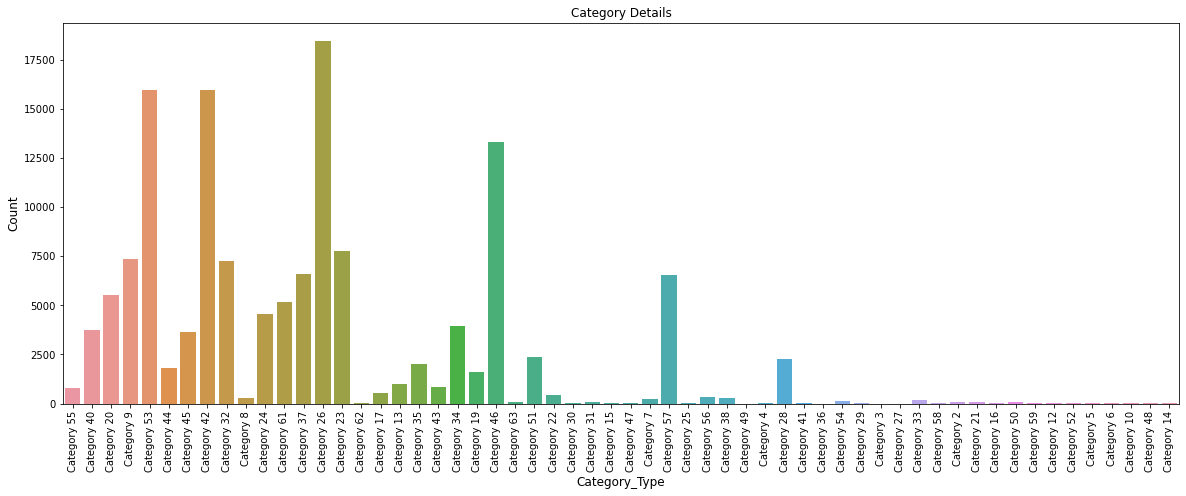

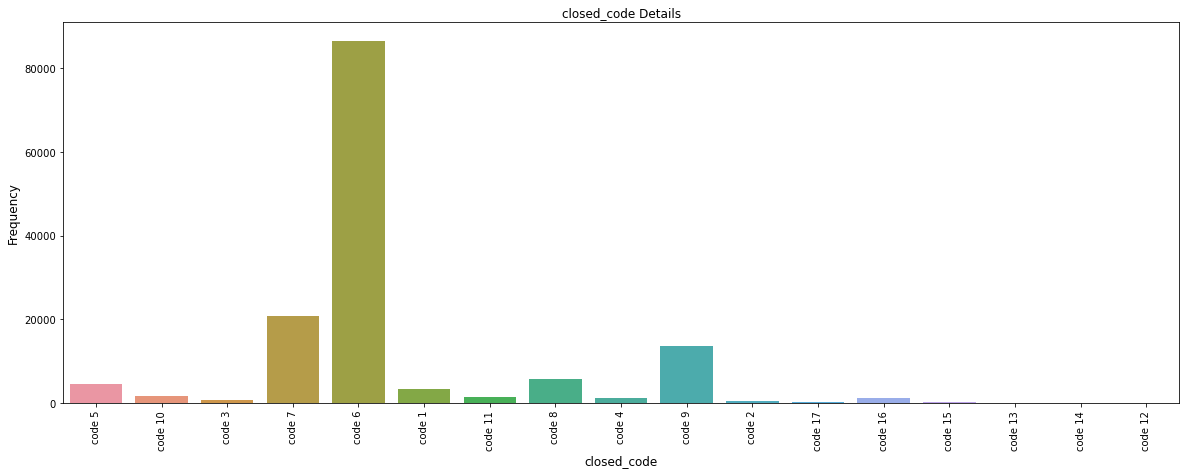

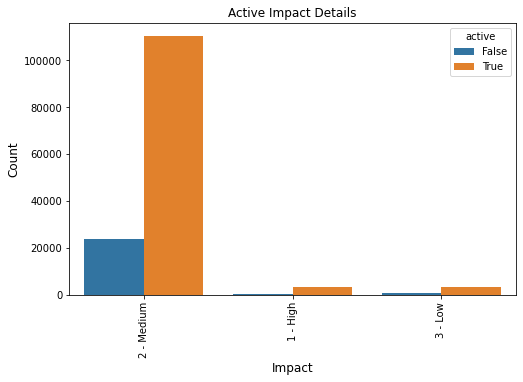

In [14]:
#data visulaization of few features to check the frequency of feature
fig,ax = plt.subplots(figsize=(20,7))
sns.countplot(df['category'])
plt.title("Category Details")
plt.xlabel("Category_Type", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(20,7))
sns.countplot(df['closed_code'])
plt.title("closed_code Details")
plt.xlabel("closed_code", size=12)
plt.ylabel("Frequency", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(8,5))
sns.countplot(x='impact',hue='active',data=df)
plt.title("Active Impact Details")
plt.xlabel("Impact", size=12)
plt.ylabel("Count", size=12)
plt.xticks(rotation=90)
plt.show()

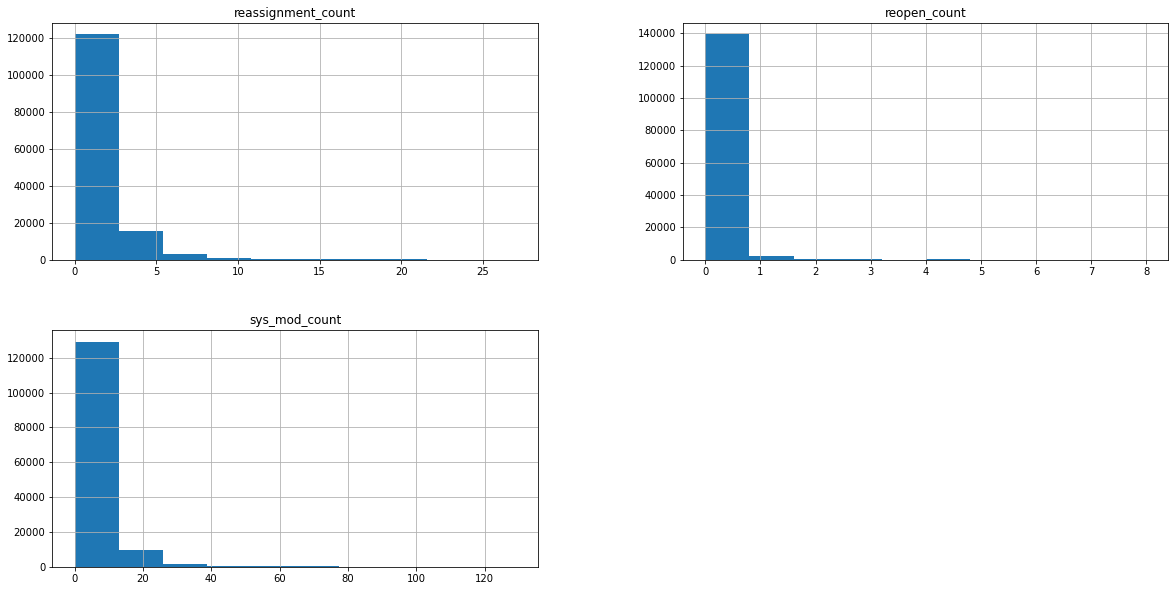

In [15]:
df.hist(figsize=(20 , 10))
plt.xticks(rotation=100)
plt.show()

In [16]:
#Converting the datatype from obj to datetime format Date column handling
df[['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at']] = df[['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at']].apply(pd.to_datetime)
df[['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at']].dtypes

#converting the datatype from obj to bool
df['notify']=df['notify'].astype('bool')

# List of categorical Data
cat_df = df.select_dtypes(include='object')#categorical data
bool_df = df.select_dtypes(include='bool')#Boolean data
num_df = df.select_dtypes(include='int64')#Numeric data
date_df = df.select_dtypes(include='datetime64[ns]')#datetime data
#Printing in tabular format
print ("\n {:<20} {:<20} {:<20} {:<20}".format('Categorical Feature','Boolean Feature','Numerical Feature','Date Feature'))
print("{:<20} {:<20} {:<20} {:<20}".format(len(cat_df.columns),len(bool_df.columns),len(num_df.columns),len(date_df.columns)))


 Categorical Feature  Boolean Feature      Numerical Feature    Date Feature        
23                   5                    3                    5                   


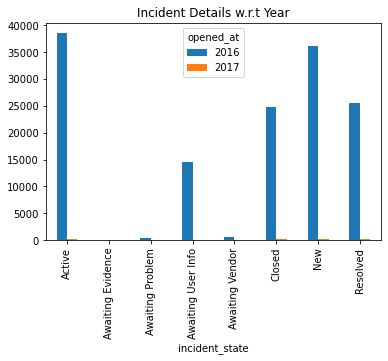

In [17]:
#plot Incident Details w.r.t Year
pd.crosstab(df.incident_state,df.opened_at.dt.year).plot(kind='bar')
plt.title("Incident Details w.r.t Year")
plt.show()

<AxesSubplot:ylabel='Frequency'>

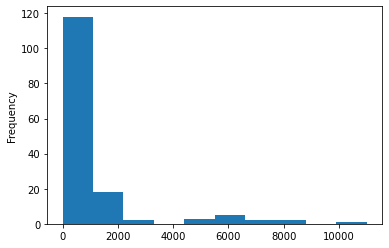

In [18]:

df_1 = df[['opened_at','incident_state']]
df_1['year']=df_1.opened_at.dt.year
df_1['month']=df_1.opened_at.dt.month
df_1.groupby(['year','month'])['incident_state'].value_counts().plot(kind='hist',x='incident_state')

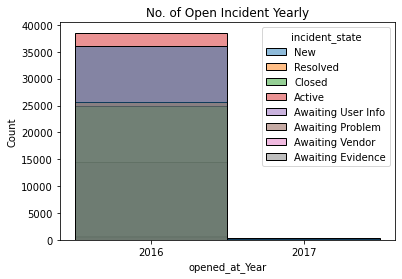

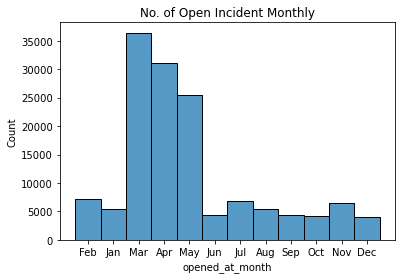

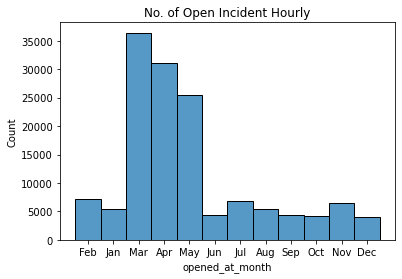

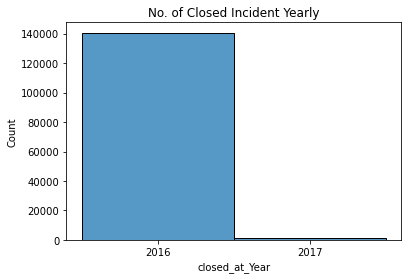

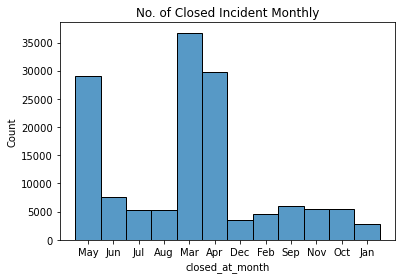

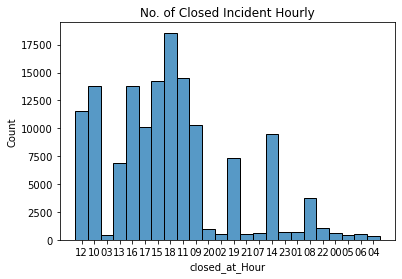

In [19]:
#no. of incidents opened in yearly based vs monthly based vs hourly based
date_df['opened_at_Year'] = date_df.opened_at.dt.strftime('%Y')
date_df['opened_at_month'] = date_df.opened_at.dt.strftime('%b')
date_df['opened_at_Hour'] = date_df.opened_at.dt.strftime('%H')
sns.histplot(data=df, x=date_df.opened_at_Year, hue='incident_state')
plt.title('No. of Open Incident Yearly')
plt.show()
sns.histplot(data=date_df, x=date_df.opened_at_month)
plt.title('No. of Open Incident Monthly')
plt.show()
sns.histplot(data=date_df, x=date_df.opened_at_month)
plt.title('No. of Open Incident Hourly')
plt.show()
date_df['closed_at_Year'] = date_df.closed_at.dt.strftime('%Y')
date_df['closed_at_month'] = date_df.closed_at.dt.strftime('%b')
date_df['closed_at_Hour'] = date_df.closed_at.dt.strftime('%H')
sns.histplot(data=date_df, x=date_df.closed_at_Year)
plt.title('No. of Closed Incident Yearly')
plt.show()
sns.histplot(data=date_df, x=date_df.closed_at_month)
plt.title('No. of Closed Incident Monthly')
plt.show()
sns.histplot(data=date_df, x=date_df.closed_at_Hour)
plt.title('No. of Closed Incident Hourly')
plt.show()



Text(0.5, 0.98, 'Numeric Feature distribution')

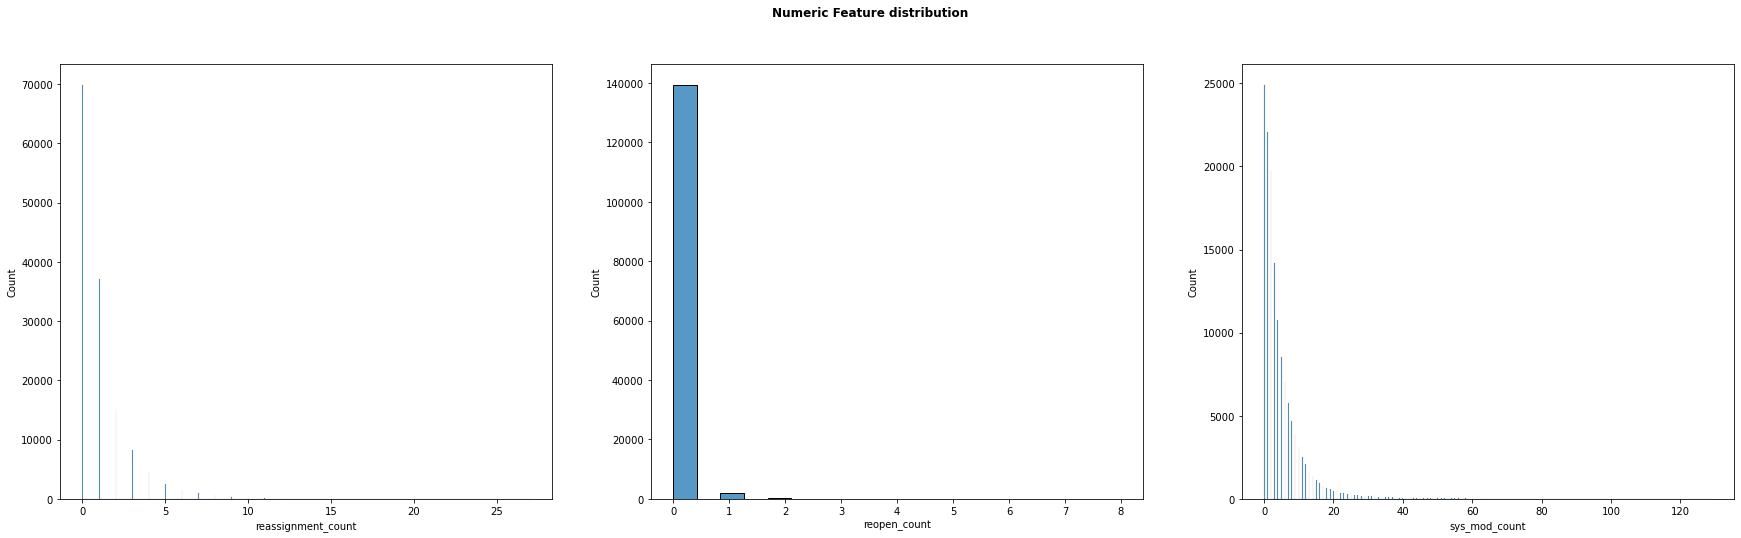

In [20]:
#visualizing numeric column
num_df.columns
fig, ax = plt.subplots(1, 3 , figsize=(30,8))
for idx, ax in enumerate(ax):
    sns.histplot(data=num_df, x=num_df.iloc[:,idx], ax=ax)

fig.suptitle('Numeric Feature distribution', ha='center', fontweight='bold')
#numeric features have a left skewed distribution.


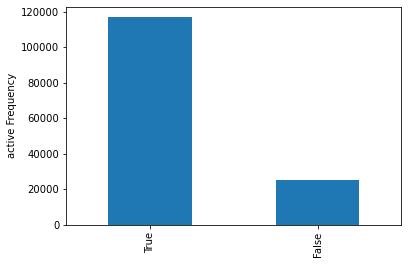

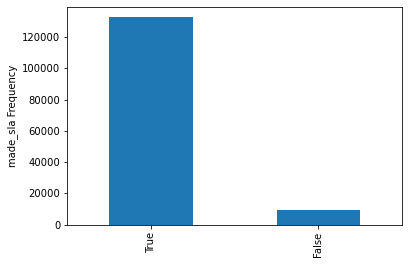

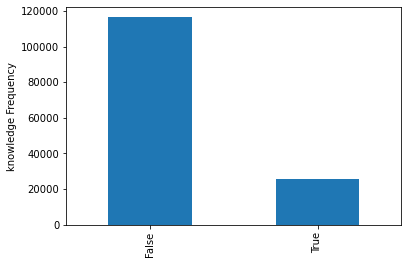

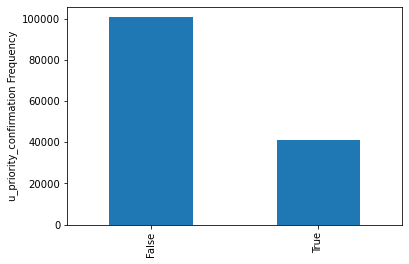

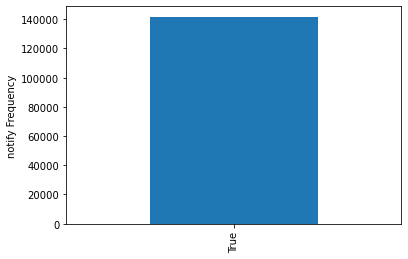

In [21]:
bol_df = df.select_dtypes(include='bool')
for col in bol_df.columns:
  df[col].value_counts().plot.bar()
  plt.ylabel(col+' Frequency')
  plt.show()

In [22]:
#Deal with missing data Below are the Imputation technique used to handle NAN values

#1.drop data
  #As we can see cmdb_ci,problem_id,rfc,vendor,caused_by have NA values in greater number nearly equal to the row size of the data set so we can remove that column
  #%of NA value is greater than 60%
df.drop(['cmdb_ci','problem_id','rfc','vendor','caused_by'],axis=1,inplace=True)
df.reset_index(drop=True)
print('Shape of DataFrame After Drop',df.shape)
print('\n--------*******************************************--------')
print('\n Total No. of Missing Values', df.isna().sum().sum())
print('\n \n--------*******************************************--------')
print('\n No. of Missing Values for each feature \n\n', df.isna().sum())
print('\n \n--------*******************************************--------')
  #Drop the whole row as we are predicting the impact of the incident and if the incident state is N/A then its of no use
df.drop(df[df.incident_state.isna()].index,axis=0,inplace=True)
df.reset_index(drop=True)
print('Shape of DataFrame After Drop 2',df.shape)
print('\n \n--------*******************************************--------')
print('\n \n Total No. of Missing Values', df.isna().sum().sum())
print('\n \n--------*******************************************--------')
print('\n \n No. of Missing Values for each feature \n\n', df.isna().sum())
print('\n \n--------*******************************************--------')
  #Drop the cols with date as we dont need that for predicting
#df.drop(['opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at'],axis=1,inplace=True)
#df.reset_index(drop=True)

#2.replace data
  #a replace/fillna it by frequency/mean/median/mode 
df.caller_id.replace(np.NaN,df.caller_id.value_counts().idxmax(),inplace=True)
df.opened_by.replace(np.NaN,df.opened_by.value_counts().idxmax(),inplace=True)
df.sys_created_by.replace(np.NaN,df.sys_created_by.value_counts().idxmax(),inplace=True)
df.sys_created_at.replace(np.NaN,df.sys_created_at.describe().top,inplace=True)#Eventually this will be non_null value as it will throw error
df.subcategory.replace(np.NaN,df.subcategory.value_counts().idxmax(),inplace=True)
df.u_symptom.replace(np.NaN,df.u_symptom.value_counts().idxmax(),inplace=True)
df.location.replace(np.NaN,df.location.value_counts().idxmax(),inplace=True)
df.category.replace(np.NaN,df.category.value_counts().idxmax(),inplace=True)
df.assignment_group.replace(np.NaN,df.assignment_group.value_counts().idxmax(),inplace=True)
df.assigned_to.replace(np.NaN,df.assigned_to.value_counts().idxmax(),inplace=True)
df.closed_code.replace(np.NaN,df.closed_code.value_counts().idxmax(),inplace=True)
df.resolved_by.replace(np.NaN,df.resolved_by.value_counts().idxmax(),inplace=True)
df.resolved_at.replace(np.NaN,df.resolved_at.describe().top,inplace=True)#Eventually this will be non_null value as it will throw error
df.reset_index()
print('Size of DataFrame',df.shape)
print('\n \n--------*******************************************--------')
print('\n \n Total No. of Missing Values', df.isna().sum().sum())
print('\n \n--------*******************************************--------')
print('\n \n No. of Missing Values for each feature \n\n', df.isna().sum())
print('\n \n--------*******************************************--------')

#3. KNN is another imputation technique used to replace the NAN values



Shape of DataFrame After Drop (141712, 31)

--------*******************************************--------

 Total No. of Missing Values 190040

 
--------*******************************************--------

 No. of Missing Values for each feature 

 number                         0
incident_state                 5
active                         0
reassignment_count             0
reopen_count                   0
sys_mod_count                  0
made_sla                       0
caller_id                     29
opened_by                   4835
opened_at                      0
sys_created_by             53076
sys_created_at             53076
sys_updated_by                 0
sys_updated_at                 0
contact_type                   0
location                      76
category                      78
subcategory                  111
u_symptom                  32964
impact                         0
urgency                        0
priority                       0
assignment_group          

In [23]:
labelencoder = LabelEncoder()
df['incident_state'] = labelencoder.fit_transform(df['incident_state'])
df['notify'] = labelencoder.fit_transform(df['notify'])
df['u_priority_confirmation'] = labelencoder.fit_transform(df['u_priority_confirmation'])
df['knowledge'] = labelencoder.fit_transform(df['knowledge'])
df['made_sla'] = labelencoder.fit_transform(df['made_sla'])
df['active'] = labelencoder.fit_transform(df['active'])
df['contact_type'] = labelencoder.fit_transform(df['contact_type'])
df.head()


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,6,1,0,0,0,1,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,Resolver 17,1,0,0,code 5,Resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00
1,INC0000045,7,1,0,0,2,1,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,Resolver 17,1,0,0,code 5,Resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00
2,INC0000045,7,1,0,0,3,1,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,Resolver 17,1,0,0,code 5,Resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00
3,INC0000045,5,0,0,0,4,1,Caller 2403,Opened by 8,2016-02-29 01:16:00,...,3 - Moderate,Group 56,Resolver 17,1,0,0,code 5,Resolved by 149,2016-02-29 11:29:00,2016-05-03 12:00:00
4,INC0000047,6,1,0,0,0,1,Caller 2403,Opened by 397,2016-02-29 04:40:00,...,3 - Moderate,Group 70,Resolver 89,1,0,0,code 5,Resolved by 81,2016-01-03 09:52:00,2016-06-03 10:00:00


In [24]:
def numbers(element):   
    return "".join(filter(str.isnumeric, element))

df.loc[:,'number'] = [numbers(x) for x in df.number]
df.loc[:,'caller_id'] = [numbers(x) for x in df.caller_id]
df.loc[:,'opened_by'] = [numbers(x) for x in df.opened_by]
df.loc[:,'sys_created_by'] = [numbers(x) for x in df.sys_created_by]
df.loc[:,'sys_updated_by'] = [numbers(x) for x in df.sys_updated_by]
df.loc[:,'location'] = [numbers(x) for x in df.location]
df.loc[:,'category'] = [numbers(x) for x in df.category]
df.loc[:,'subcategory'] = [numbers(x) for x in df.subcategory]
df.loc[:,'u_symptom'] = [numbers(x) for x in df.u_symptom]
df.loc[:,'assignment_group'] = [numbers(x) for x in df.assignment_group]
df.loc[:,'assigned_to'] = [numbers(x) for x in df.assigned_to]
df.loc[:,'closed_code'] = [numbers(x) for x in df.closed_code]
df.loc[:,'resolved_by'] = [numbers(x) for x in df.resolved_by]
df.loc[:,'impact'] = [numbers(x) for x in df.impact]
df.loc[:,'urgency'] = [numbers(x) for x in df.urgency]
df.loc[:,'priority'] = [numbers(x) for x in df.priority]

df.head()


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,priority,assignment_group,assigned_to,knowledge,u_priority_confirmation,notify,closed_code,resolved_by,resolved_at,closed_at
0,0000045,6,1,0,0,0,1,2403,8,2016-02-29 01:16:00,...,3,56,17,1,0,0,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
1,0000045,7,1,0,0,2,1,2403,8,2016-02-29 01:16:00,...,3,56,17,1,0,0,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
2,0000045,7,1,0,0,3,1,2403,8,2016-02-29 01:16:00,...,3,56,17,1,0,0,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
3,0000045,5,0,0,0,4,1,2403,8,2016-02-29 01:16:00,...,3,56,17,1,0,0,5,149,2016-02-29 11:29:00,2016-05-03 12:00:00
4,0000047,6,1,0,0,0,1,2403,397,2016-02-29 04:40:00,...,3,70,89,1,0,0,5,81,2016-01-03 09:52:00,2016-06-03 10:00:00


In [25]:
df['opened_at_year']=df.opened_at.dt.year
df['opened_at_month']=df.opened_at.dt.month
df['opened_at_day']=df.opened_at.dt.day
df['opened_at_hour']=df.opened_at.dt.hour

df['sys_created_at_year']=df.sys_created_at.dt.year
df['sys_created_at_month']=df.sys_created_at.dt.month
df['sys_created_at_day']=df.sys_created_at.dt.day
df['sys_created_at_hour']=df.sys_created_at.dt.hour

df['sys_updated_at_year']=df.sys_updated_at.dt.year
df['sys_updated_at_month']=df.sys_updated_at.dt.month
df['sys_updated_at_day']=df.sys_updated_at.dt.day
df['sys_updated_at_hour']=df.sys_updated_at.dt.hour

df['resolved_at_year']=df.resolved_at.dt.year
df['resolved_at_month']=df.resolved_at.dt.month
df['resolved_at_day']=df.resolved_at.dt.day
df['resolved_at_hour']=df.resolved_at.dt.hour

df['closed_at_year']=df.closed_at.dt.year
df['closed_at_month']=df.closed_at.dt.month
df['closed_at_day']=df.closed_at.dt.day
df['closed_at_hour']=df.closed_at.dt.hour






In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141707 entries, 0 to 141711
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141707 non-null  object        
 1   incident_state           141707 non-null  int32         
 2   active                   141707 non-null  int64         
 3   reassignment_count       141707 non-null  int64         
 4   reopen_count             141707 non-null  int64         
 5   sys_mod_count            141707 non-null  int64         
 6   made_sla                 141707 non-null  int64         
 7   caller_id                141707 non-null  object        
 8   opened_by                141707 non-null  object        
 9   opened_at                141707 non-null  datetime64[ns]
 10  sys_created_by           141707 non-null  object        
 11  sys_created_at           141707 non-null  datetime64[ns]
 12  sys_updated_by  

In [27]:
df.impact.value_counts()


2    134330
3      3886
1      3491
Name: impact, dtype: int64

In [28]:
#DataType conversion
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141707 entries, 0 to 141711
Data columns (total 51 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   number                   141707 non-null  int32         
 1   incident_state           141707 non-null  int32         
 2   active                   141707 non-null  int64         
 3   reassignment_count       141707 non-null  int64         
 4   reopen_count             141707 non-null  int64         
 5   sys_mod_count            141707 non-null  int64         
 6   made_sla                 141707 non-null  int64         
 7   caller_id                141707 non-null  int32         
 8   opened_by                141707 non-null  int32         
 9   opened_at                141707 non-null  datetime64[ns]
 10  sys_created_by           141707 non-null  int32         
 11  sys_created_at           141707 non-null  datetime64[ns]
 12  sys_updated_by  

<AxesSubplot:xlabel='urgency', ylabel='priority'>

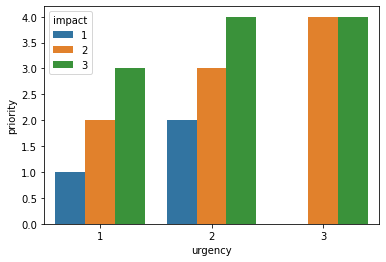

In [29]:
sns.barplot(x=df.urgency,y=df.priority,hue=df.impact,data=df)
#Relationship btwn priority,impact,urgency

<AxesSubplot:xlabel='urgency'>

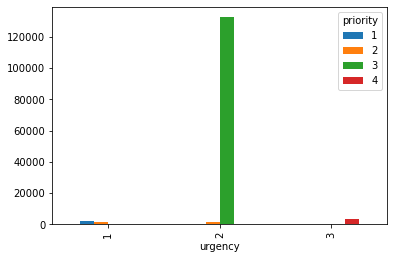

In [30]:
pd.crosstab(df.urgency,df.priority).plot(kind='bar')

<AxesSubplot:xlabel='impact'>

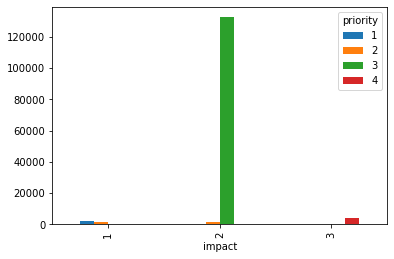

In [31]:
pd.crosstab(df.impact,df.priority).plot(kind='bar')

<AxesSubplot:xlabel='impact'>

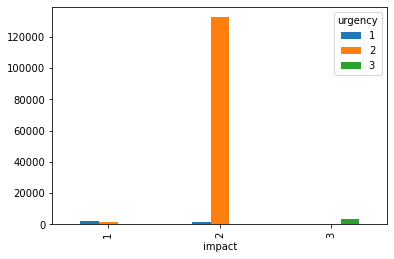

In [32]:
pd.crosstab(df.impact,df.urgency).plot(kind='bar')

In [33]:
#Outliers prediction using isolation forest
df1 = df.select_dtypes('int64')
clf = IsolationForest(random_state=10,contamination=.01)#contamination: based on domain knowlege we are defiining that 1% of outliers might be present
clf.fit(df1)
df['anomaly'] = clf.predict(df1)#predicting the outliers
df['anomaly_scores']=clf.decision_function(df1)
print('Total no of outliers ',len(df[df['anomaly']==-1]))
print('Shape of DF',df.shape)
'''df.drop(df[df['anomaly']==-1].index,axis=0,inplace=True)
df.reset_index(drop=True)
print('Shape of DF after dropping ',df.shape)'''

Total no of outliers  1418
Shape of DF (141707, 53)


"df.drop(df[df['anomaly']==-1].index,axis=0,inplace=True)\ndf.reset_index(drop=True)\nprint('Shape of DF after dropping ',df.shape)"

In [34]:

#Saving the cleaned file for future reference
#df.to_csv('DataClean_incident_event_log.csv',index=False)

<AxesSubplot:>

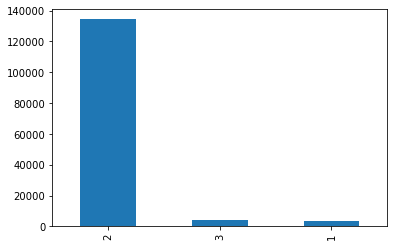

In [35]:
df.impact.value_counts().plot.bar() #imbalanced ddata

In [36]:
#We are doing this to get the same proportion/data distributions even after splitting the data from the original data
def get_class_count(df):
  grp = df.groupby(['impact'])['number'].nunique()
  return {key : grp[key] for key in list(grp.keys())}

def get_class_proportion(df):
  count = get_class_count(df)
  return { val[0] : round(val[1]/df.shape[0],4) for val in count.items()}

print('Dataset class count',get_class_count(df))
print('Dataset class proportion',get_class_proportion(df))

#we use stratify which will lock the distribution of classes in train and test sets which will hold the same distribution
train,test = train_test_split(df,test_size=0.3,random_state=42)
#print('Dataset class proportion after partition',get_class_proportion(train))
#print('Dataset class proportion after partition',get_class_proportion(test))
#We are splitting the data into train test after EDA as we understand the data and patterns completly
#Next step is feature engg and we use sme ML algo for Feature engg i.e we shuldn't allow model to remember so before feature engg only we divide data
Y_train = train.impact.reset_index(drop=True)
X_train = train.drop(columns=['impact','opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at','anomaly','anomaly_scores']).reset_index(drop=True)
Y_test = test.impact.reset_index(drop=True)
X_test = test.drop(columns=['impact','opened_at','sys_created_at','sys_updated_at','resolved_at','closed_at','anomaly','anomaly_scores']).reset_index(drop=True)

Dataset class count {1: 512, 2: 23967, 3: 764}
Dataset class proportion {1: 0.0036, 2: 0.1691, 3: 0.0054}


In [37]:
X_test

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,sys_updated_at_day,sys_updated_at_hour,resolved_at_year,resolved_at_month,resolved_at_day,resolved_at_hour,closed_at_year,closed_at_month,closed_at_day,closed_at_hour
0,23942,6,1,5,0,10,1,5475,8,6,...,29,13,2016,4,29,14,2016,4,5,15
1,21116,2,1,4,0,7,1,1329,305,10,...,29,15,2016,4,29,15,2016,4,5,15
2,5538,0,1,1,0,1,1,736,59,34,...,3,21,2016,3,17,10,2016,3,24,19
3,24000,7,1,1,0,2,1,621,501,216,...,29,9,2016,4,29,9,2016,4,5,10
4,28542,3,1,1,0,7,1,3800,500,10,...,13,11,2016,5,18,10,2016,5,23,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42508,12329,7,1,0,0,1,1,681,17,10,...,29,15,2016,3,29,15,2016,3,4,15
42509,9431,0,1,0,0,0,1,3329,184,10,...,21,11,2016,3,21,17,2016,3,26,17
42510,9704,6,1,0,0,0,1,1154,58,31,...,21,18,2016,3,22,16,2016,3,27,16
42511,16545,7,1,0,0,5,1,675,386,167,...,13,15,2016,4,13,15,2016,4,18,16


In [38]:
'''Feature Selection
1. Filter methods: It pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and 
less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.
  Filter Methods:
    Information Gain
    Chi-square Test
    Fisher’s Score
    Pearson Correlation
    Variance Threshold
    Mean Absolute Difference (MAD)
2.Wrapper Methods: to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset.
. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion
  Wrapper Methods:
    Forward Feature Selection
    Backward Feature Elimination
    Exhaustive Feature Selection
    Recursive Feature Elimination
3.Embedded Methods:These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable 
computational cost. Embedded methods are iterative and  extracts those features which contribute the most to the training for a particular iteration.
  Embedded Methods:
    LASSO Regularization (L1)
    Random Forest
    Decission Tree'''


'Feature Selection\n1. Filter methods: It pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and \nless computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.\n  Filter Methods:\n    Information Gain\n    Chi-square Test\n    Fisher’s Score\n    Pearson Correlation\n    Variance Threshold\n    Mean Absolute Difference (MAD)\n2.Wrapper Methods: to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset.\n. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion\n  Wrapper Methods:\n    Forward Feature Selection\n    Backward Feature Elimination\n    Exhaustive Feature Selection\n    Recursive Feature Elimination\n3.Embedded Methods:These methods encom

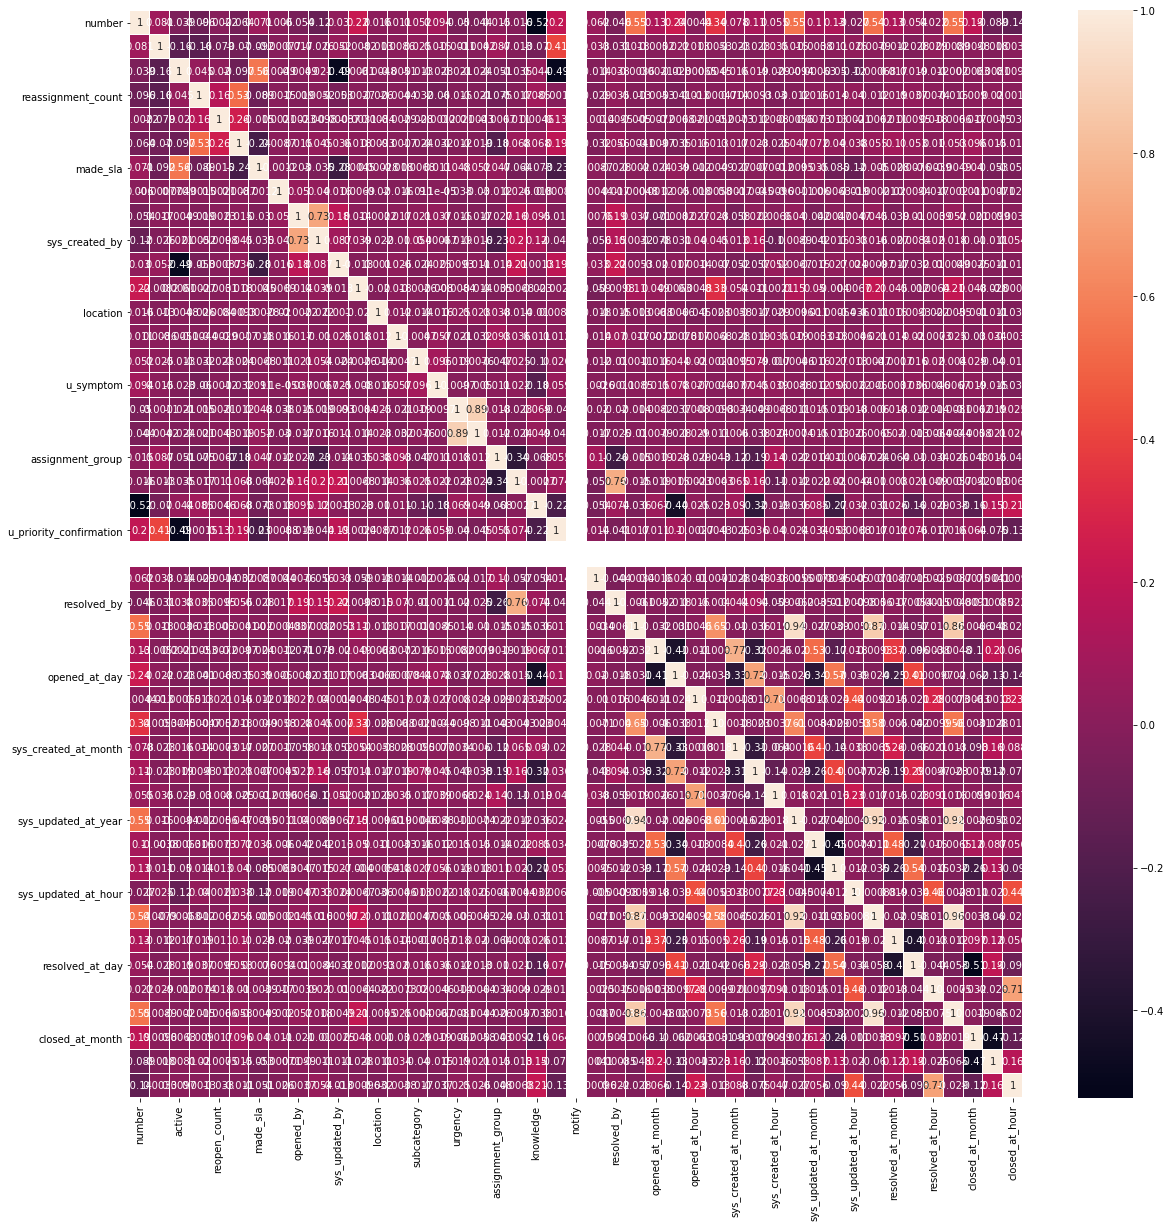

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,sys_created_by,...,sys_updated_at_day,sys_updated_at_hour,resolved_at_year,resolved_at_month,resolved_at_day,resolved_at_hour,closed_at_year,closed_at_month,closed_at_day,closed_at_hour
number,NaN,0.081055,-0.039085,-0.095645,-0.002192,-0.064389,0.070989,0.006017,-0.053849,-0.117134,...,0.126149,-0.026904,0.538106,0.129700,0.053867,0.022015,0.551166,0.186108,-0.088688,-0.139567
incident_state,NaN,NaN,-0.164832,-0.163099,-0.078612,-0.070347,-0.091913,-0.000769,0.016692,-0.026456,...,0.010746,0.025259,0.007950,-0.011868,-0.027902,0.029251,0.008949,0.009844,-0.018257,0.003273
active,NaN,NaN,NaN,0.044569,0.019976,-0.096894,0.564181,0.004945,-0.004851,0.021441,...,-0.050175,-0.119954,-0.000677,0.017173,0.018794,-0.011592,-0.002032,0.006316,0.008066,0.009660
reassignment_count,NaN,NaN,NaN,NaN,0.161602,0.529299,-0.088658,0.001501,-0.019071,0.005217,...,0.013600,0.040105,-0.012191,0.019372,0.036520,0.007404,-0.014770,0.008981,0.020107,0.001318
reopen_count,NaN,NaN,NaN,NaN,NaN,0.255056,-0.014774,0.002085,0.002263,-0.009786,...,0.012891,0.002113,-0.006178,0.011408,0.009476,0.018437,-0.006647,0.016800,-0.007542,-0.033320
sys_mod_count,NaN,NaN,NaN,NaN,NaN,NaN,-0.241519,0.008720,0.015055,0.044585,...,0.039509,0.037677,0.055225,0.101003,0.053010,0.010421,0.052890,0.095684,0.014763,-0.010839
made_sla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001189,-0.030445,-0.034713,...,-0.084891,-0.121750,-0.005028,-0.027530,0.007610,-0.003898,-0.004920,0.039782,-0.052698,-0.050603
caller_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.050032,0.039502,...,0.006316,-0.019373,-0.000208,-0.020136,0.009409,-0.017289,-0.001959,0.011205,-0.000714,-0.026289
opened_by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.726802,...,0.004660,0.004688,0.044999,-0.039357,0.010018,-0.003912,0.051534,-0.021281,0.009876,0.003746
sys_created_by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.014613,0.033076,0.016299,-0.026996,0.008414,0.019676,0.018317,-0.010020,-0.011322,0.053832


In [39]:
#Pearson Correlation
corr_matrix = X_train.corr()
sns.heatmap(corr_matrix,annot=True,linewidths=0.02)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))  
upper


In [40]:
#highly correlated when the value is grater than 0.9 we are marking that as 0 not considering feature
to_drop_high = [column for column in upper.columns if any(upper[column] > 0.9)]
#to_drop_less = [column for column in upper.columns if any(upper[column] < 0.1 )]
feature_imp_df = pd.DataFrame(X_train.columns)
feature_imp_df.columns = ['feature']
feature_imp_df.set_index('feature',inplace=True)
feature_imp_df['pearson_Corr_FI'] = 1
for col in to_drop_high:
  feature_imp_df.loc[col]['pearson_Corr_FI'] = 0 

In [41]:
#Feature Selection
#1. decisison Tree
model_dt_entropy = DecisionTreeClassifier(criterion='entropy')# as the dependent var is categorical so we can use either c5.0(entropy) or CART(gini impurities)
model_dt_entropy.fit(X_train,Y_train)
#print("Decession Tree Feature selection using C5.0 or Entropy \n",model_dt_entropy.feature_importances_)
model_dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_dt_gini.fit(X_train, Y_train)
#print("Decession Tree Feature selection using Gini Impurities \n",model_dt_gini.feature_importances_)
feature_imp_df['DT_Entropy_FI'] = model_dt_entropy.feature_importances_
feature_imp_df['DT_Ginni_FI'] = model_dt_gini.feature_importances_

#2. Mutual Info btwn two random variable(dependent and independent) which measures the dependency between them. It uses KNN
#It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency with Y.
classif = mutual_info_classif(X_train,Y_train)
feature_imp_df['mutual_info_classif_FI'] = classif

#3. Chi-squared and f_classif using SelectKBest
# chi2 gives the score of each feature and highest score we consider for feature selection in the same order of the column name
selectKBest_chi2 = SelectKBest(score_func = chi2)
selectKBest_chi2.fit(X_train, Y_train)
feature_imp_df['selectKBest_chi2_FI'] = selectKBest_chi2.scores_
feature_imp_df['selectKBest_chi2_FI'] = round(feature_imp_df['selectKBest_chi2_FI'],3)
#Same as above mutual_info_classif algo it is just using selectKBest algo
'''selectKBest_MIF = SelectKBest(score_func = mutual_info_classif)
selectKBest_MIF.fit(X_train, Y_train)
feature_imp_df['selectKBest_MIF_FI'] = selectKBest_MIF.scores_
feature_imp_df['selectKBest_MIF_FI'] = round(feature_imp_df['selectKBest_MIF_FI'],3)'''
#ANOVA f-test in the f_classif used in a feature selection strategy, such as selecting the top k most relevant features (largest values)
selectKBest_f_classif = SelectKBest(score_func = f_classif)
selectKBest_f_classif.fit(X_train, Y_train)
feature_imp_df['selectKBest_f_classif_FI'] = selectKBest_f_classif.scores_
feature_imp_df['selectKBest_f_classif_FI'] = round(feature_imp_df['selectKBest_f_classif_FI'],3)

#4. RFE
#ranking_ 1 means top feature and 2 means second top and it goes
rfe_sel = RFE(estimator=LogisticRegression(max_iter=400), step=10, verbose=5)
rfe_sel.fit(X_train,Y_train)
feature_imp_df['RFE_FI'] = rfe_sel.ranking_
feature_imp_df['RFE_FI'] = rfe_sel.ranking_

#5. Random Forest
num_trees=300
randomForestCla = RandomForestClassifier(n_estimators=num_trees)
randomForestCla.fit(X_train,Y_train)
feature_imp_df['randomForestCla_FI'] = randomForestCla.feature_importances_


'''#Random Forest and laso using SelectFromModel method
smf_randomForestCla = SelectFromModel(RandomForestClassifier(n_estimators=num_trees))
smf_randomForestCla.fit(X_train, Y_train)
embeded_rf_support = smf_randomForestCla.get_support()
feature_imp_df['smf_randomForestCla_FI'] = labelencoder.fit_transform(embeded_rf_support) #True as 1 fasle as 0'''



Fitting estimator with 45 features.
Fitting estimator with 35 features.
Fitting estimator with 25 features.


"#Random Forest and laso using SelectFromModel method\nsmf_randomForestCla = SelectFromModel(RandomForestClassifier(n_estimators=num_trees))\nsmf_randomForestCla.fit(X_train, Y_train)\nembeded_rf_support = smf_randomForestCla.get_support()\nfeature_imp_df['smf_randomForestCla_FI'] = labelencoder.fit_transform(embeded_rf_support) #True as 1 fasle as 0"

In [42]:
feature_imp_df

,pearson_Corr_FI,DT_Entropy_FI,DT_Ginni_FI,mutual_info_classif_FI,selectKBest_chi2_FI,selectKBest_f_classif_FI,RFE_FI,randomForestCla_FI
feature,,,,,,,,
number,1,0.006017,0.003745,0.177002,2858159.862,147.781,4,0.017092
incident_state,1,0.000000,0.000000,0.005445,8.930,2.464,4,0.001575
active,1,0.000000,0.000000,0.015124,9.744,27.674,4,0.000238
reassignment_count,1,0.000000,0.000000,0.002365,163.522,30.118,1,0.003557
reopen_count,1,0.000000,0.000000,0.000160,47.385,11.590,4,0.000356
sys_mod_count,1,0.000304,0.000000,0.001803,1163.400,50.264,1,0.004521
made_sla,1,0.000000,0.000000,0.020939,13.007,100.713,4,0.000500
caller_id,1,0.000972,0.000000,0.101547,47896.371,24.671,4,0.012400
opened_by,1,0.002398,0.002620,0.069821,99709.463,271.037,3,0.022439


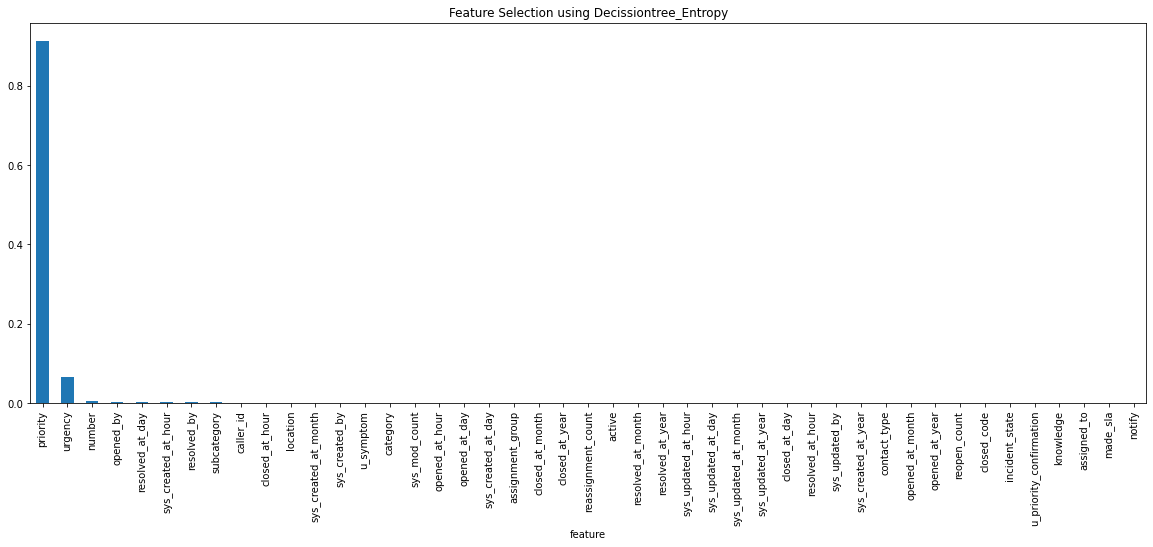

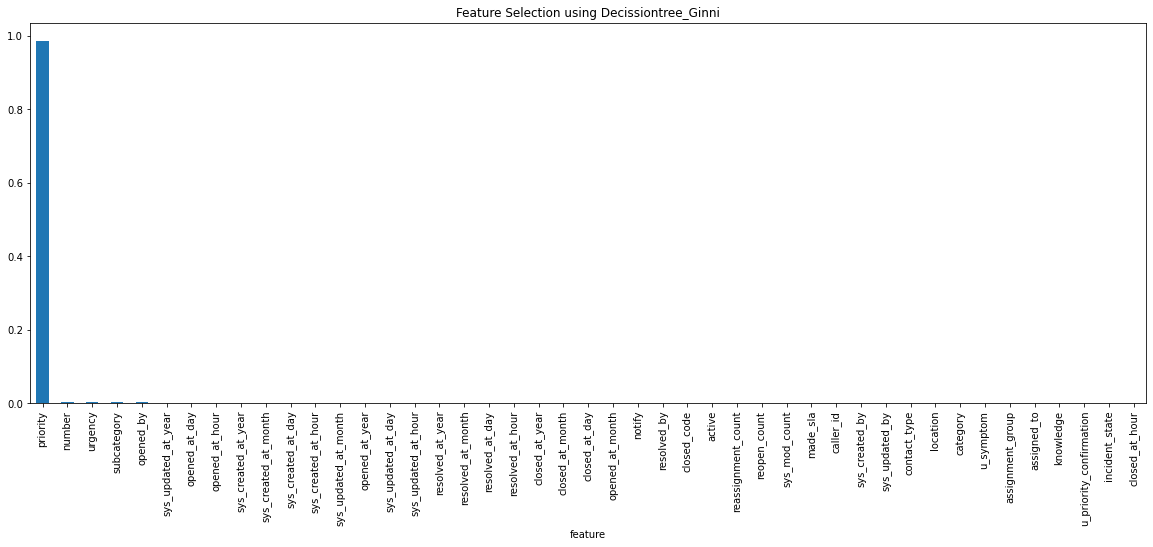

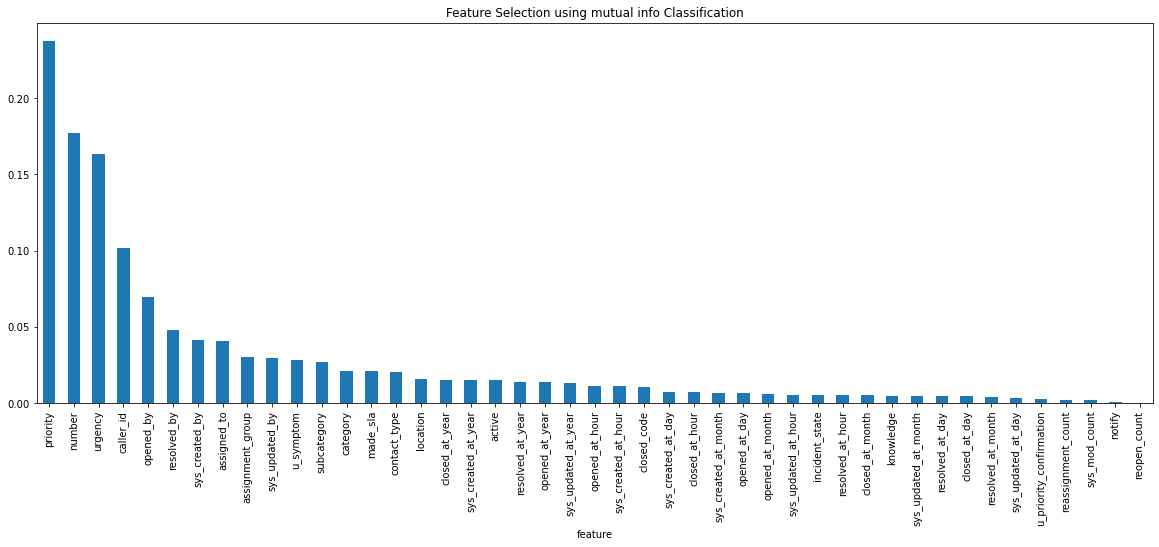

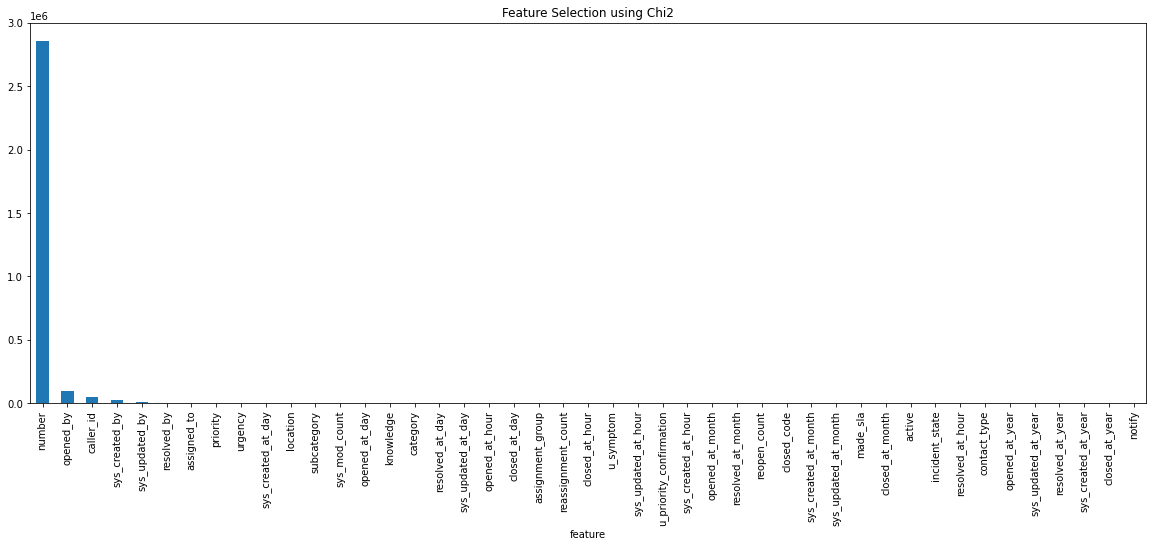

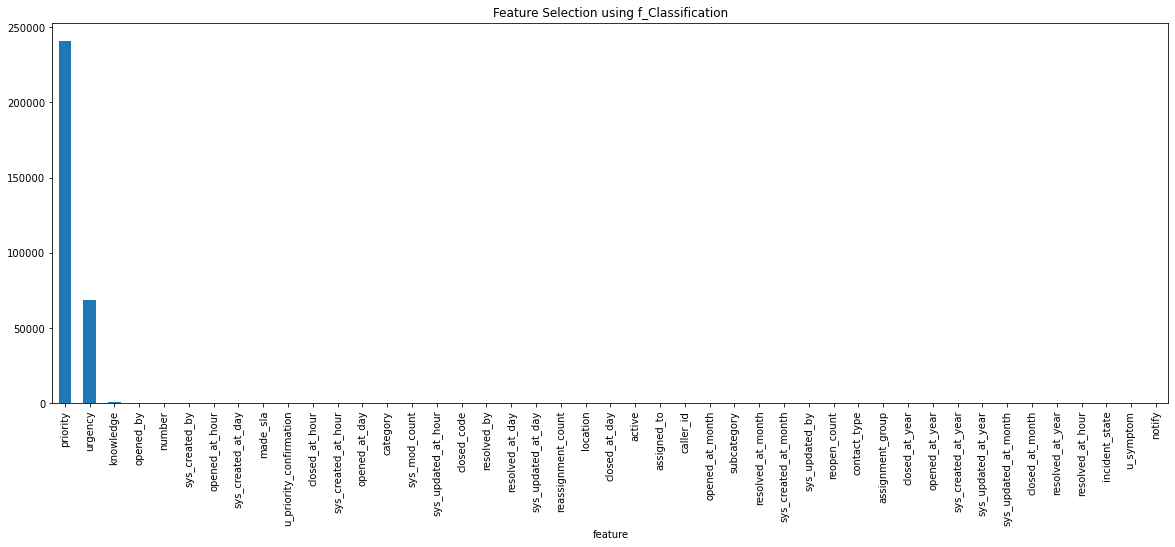

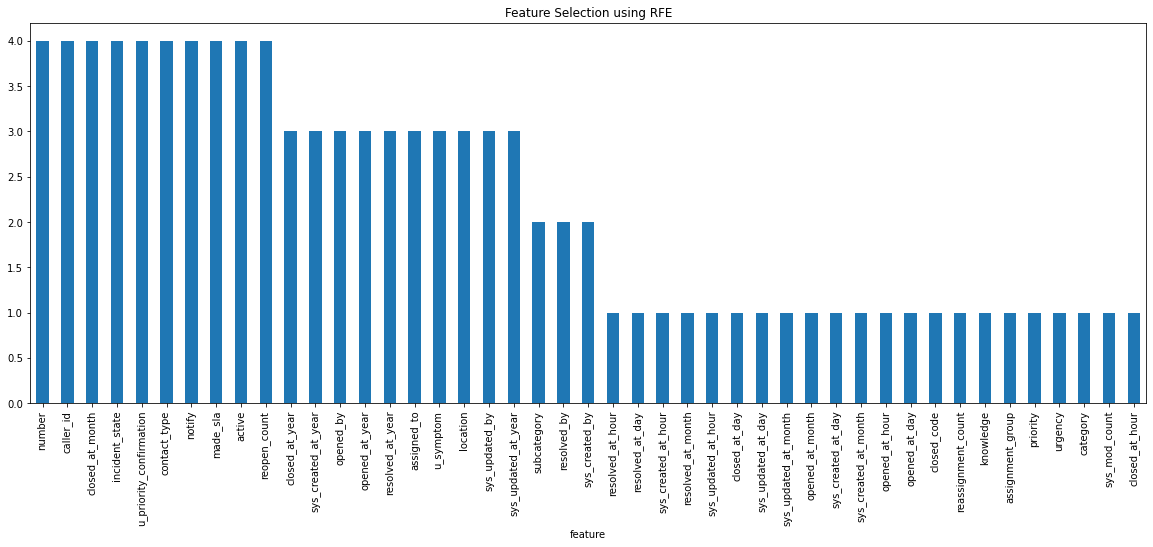

In [43]:
'''
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(feature_imp_df.index,feature_imp_df['pearson_Corr_FI'],color='teal')
plt.title("Feature Selection using Pearson Correlation")
plt.xlabel("features", size=12)
plt.ylabel("FI_Value", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(feature_imp_df.index,feature_imp_df['DT_Entropy_FI'])
plt.title("Feature Selection using Decissiontree_Entropy")
plt.xlabel("features", size=12)
plt.ylabel("FI_Value", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(feature_imp_df.index,feature_imp_df['DT_Ginni_FI'])
plt.title("Feature Selection using Decissiontree_Ginni")
plt.xlabel("features", size=12)
plt.ylabel("FI_Value", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(feature_imp_df.index,feature_imp_df['mutual_info_classif_FI'],color='teal')
plt.title("Feature Selection using mutual info Classification")
plt.xlabel("features", size=12)
plt.ylabel("FI_Value", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(feature_imp_df.index,feature_imp_df['selectKBest_chi2_FI'],color='teal')
plt.title("Feature Selection using Chi2")
plt.xlabel("features", size=12)
plt.ylabel("FI_Value", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(feature_imp_df.index,feature_imp_df['selectKBest_f_classif_FI'])
plt.title("Feature Selection using f_Classification")
plt.xlabel("features", size=12)
plt.ylabel("FI_Value", size=12)
plt.xticks(rotation=90)
plt.show()
fig,ax = plt.subplots(figsize=(20,7))
sns.barplot(feature_imp_df.index,feature_imp_df['RFE_FI'],color='teal')
plt.title("Feature Selection using RFE")
plt.xlabel("features", size=12)
plt.ylabel("FI_Value", size=12)
plt.xticks(rotation=90)
plt.show()
'''

feature_imp_df.DT_Entropy_FI.sort_values(ascending=False).plot.bar(figsize=(20,7))
plt.title("Feature Selection using Decissiontree_Entropy")
plt.show()
feature_imp_df.DT_Ginni_FI.sort_values(ascending=False).plot.bar(figsize=(20,7))
plt.title("Feature Selection using Decissiontree_Ginni")
plt.show()
feature_imp_df.mutual_info_classif_FI.sort_values(ascending=False).plot.bar(figsize=(20,7))
plt.title("Feature Selection using mutual info Classification")
plt.show()
feature_imp_df.selectKBest_chi2_FI.sort_values(ascending=False).plot.bar(figsize=(20,7))
plt.title("Feature Selection using Chi2")
plt.show()
feature_imp_df.selectKBest_f_classif_FI.sort_values(ascending=False).plot.bar(figsize=(20,7))
plt.title("Feature Selection using f_Classification")
plt.show()
feature_imp_df.RFE_FI.sort_values(ascending=False).plot.bar(figsize=(20,7))
plt.title("Feature Selection using RFE")
plt.show()


In [44]:
feature_imp_df.columns

Index(['pearson_Corr_FI', 'DT_Entropy_FI', 'DT_Ginni_FI',
       'mutual_info_classif_FI', 'selectKBest_chi2_FI',
       'selectKBest_f_classif_FI', 'RFE_FI', 'randomForestCla_FI'],
      dtype='object')

In [45]:
feature_imp_df.DT_Entropy_FI.sort_values(ascending=False).iloc[:10]


feature
priority               0.912987
urgency                0.066523
number                 0.006017
opened_by              0.002398
resolved_at_day        0.001973
sys_created_at_hour    0.001952
resolved_by            0.001781
subcategory            0.001720
caller_id              0.000972
closed_at_hour         0.000544
Name: DT_Entropy_FI, dtype: float64

In [46]:
feature_imp_df.DT_Ginni_FI.sort_values(ascending=False).iloc[:10]

feature
priority                0.986494
number                  0.003745
urgency                 0.003678
subcategory             0.003462
opened_by               0.002620
sys_updated_at_year     0.000000
opened_at_day           0.000000
opened_at_hour          0.000000
sys_created_at_year     0.000000
sys_created_at_month    0.000000
Name: DT_Ginni_FI, dtype: float64

In [47]:
feature_imp_df.mutual_info_classif_FI.sort_values(ascending=False).iloc[:10]


feature
priority            0.237477
number              0.177002
urgency             0.163518
caller_id           0.101547
opened_by           0.069821
resolved_by         0.047752
sys_created_by      0.041307
assigned_to         0.041028
assignment_group    0.030053
sys_updated_by      0.029663
Name: mutual_info_classif_FI, dtype: float64

In [48]:
feature_imp_df.selectKBest_chi2_FI.sort_values(ascending=False).iloc[:10]

feature
number                2858159.862
opened_by               99709.463
caller_id               47896.371
sys_created_by          21586.496
sys_updated_by           5594.441
resolved_by              3623.873
assigned_to              3533.221
priority                 3099.543
urgency                  1540.025
sys_created_at_day       1305.912
Name: selectKBest_chi2_FI, dtype: float64

In [49]:
feature_imp_df.selectKBest_f_classif_FI.sort_values(ascending=False).iloc[:10]

feature
priority                   240919.546
urgency                     68912.228
knowledge                     450.432
opened_by                     271.037
number                        147.781
sys_created_by                136.487
opened_at_hour                126.308
sys_created_at_day            103.377
made_sla                      100.713
u_priority_confirmation        78.401
Name: selectKBest_f_classif_FI, dtype: float64

In [50]:

feature_imp_df.RFE_FI[feature_imp_df.RFE_FI == 1]


feature
reassignment_count      1
sys_mod_count           1
category                1
urgency                 1
priority                1
assignment_group        1
knowledge               1
closed_code             1
opened_at_month         1
opened_at_day           1
opened_at_hour          1
sys_created_at_month    1
sys_created_at_day      1
sys_created_at_hour     1
sys_updated_at_month    1
sys_updated_at_day      1
sys_updated_at_hour     1
resolved_at_month       1
resolved_at_day         1
resolved_at_hour        1
closed_at_day           1
closed_at_hour          1
Name: RFE_FI, dtype: int32

In [51]:
feature_imp_df.randomForestCla_FI.sort_values(ascending=False).iloc[:10]

feature
priority               0.498891
urgency                0.269597
opened_by              0.022439
number                 0.017092
caller_id              0.012400
sys_created_by         0.011271
resolved_by            0.010843
subcategory            0.010366
opened_at_hour         0.010356
sys_created_at_hour    0.009136
Name: randomForestCla_FI, dtype: float64

In [52]:
pps_matrix = pps.matrix(df.iloc[:,0:-2])
pps_df = pps_matrix[['x', 'y', 'ppscore','baseline_score','model_score']]
#Calculate the Predictive Power Score (PPS) for "x predicts y"
#The score always ranges from 0 to 1 and is data-type agnostic.
#A score of 0 means that the column x cannot predict the column y better than a naive baseline model.
#A score of 1 means that the column x can perfectly predict the column y given the model.
#A score between 0 and 1 states the ratio of how much potential predictive power the model achieved compared to the baseline model.
#and to consider the feature if p score is > 0.5 and if model score is greater than the baseline score then we can consider the feature
index = []
for x in np.arange(len(pps_df)):
  if(pps_df.iloc[x].ppscore > 0.5 and pps_df.iloc[x].ppscore < 1):
      index.append(x)

pps_df.iloc[index]

,x,y,ppscore,baseline_score,model_score
14,number,contact_type,0.542857,0.0070,0.003200
24,number,knowledge,0.964932,0.1768,0.006200
32,number,opened_at_month,0.988629,1.9172,0.021800
33,number,opened_at_day,0.994663,8.8812,0.047400
34,number,opened_at_hour,0.849102,3.1518,0.475600
...,...,...,...,...,...
2344,resolved_at_day,closed_at_day,0.645723,8.6730,3.072644
2396,resolved_at_hour,closed_at_hour,0.540584,3.2248,1.481523
2436,closed_at_year,sys_updated_at_year,0.638801,0.0054,0.001950
2440,closed_at_year,resolved_at_year,0.877249,0.0062,0.000761


In [53]:
  #This csv is used for deployment time
  df_final = df[['number','caller_id','opened_by','sys_created_by','sys_created_at_day','urgency','priority','resolved_by','opened_at_hour','impact']]
  df_final.to_csv('FinalData_incidentlog.csv',index=False)

In [54]:
#Baesd on the above feature sellection techniques we will use 'number','caller_id','opened_by','sys_created_by','sys_created_at_day','urgency','priority','resolved_by','opened_at_hour'

In [55]:

X_train_Fsel = X_train[['number','caller_id','opened_by','sys_created_by','sys_created_at_day','urgency','priority','resolved_by','opened_at_hour']]
X_test_Fsel = X_test[['number','caller_id','opened_by','sys_created_by','sys_created_at_day','urgency','priority','resolved_by','opened_at_hour']]

Training target statistics: {Counter(Y_train)}
Testing target statistics: {Counter(Y_test)}


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

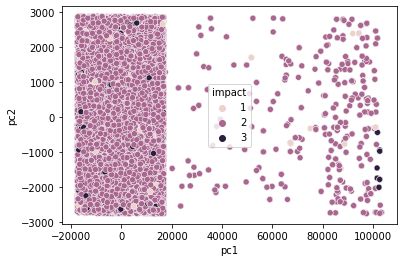

In [56]:
##imbalanced data data distribution
print("Training target statistics: {Counter(Y_train)}")
print("Testing target statistics: {Counter(Y_test)}")
pca = PCA(n_components=2)
pca.fit(X_train_Fsel.values)
X_pca = pca.transform(X_train_Fsel.values)
df_1 = pd.DataFrame(X_pca,columns=['pc1','pc2'])
df_2 = pd.DataFrame(Y_train).reset_index(drop=True)
finalDf = pd.concat([df_1.reset_index(drop=True),df_2.reset_index(drop=True)],axis=1)
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='impact')
    

In [57]:

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train_Fsel, Y_train)
dummy_pred = dummy.predict(X_test_Fsel)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(Y_test, dummy_pred))
#As the Dummy Classifier predicts only impact 2, it is clearly not a good option for our objective of correctly classifying fraudulent transactions.

Unique predicted labels:  [2]
Test score:  0.9470514901324301


In [58]:

sm = SMOTE(random_state=42)
x_train_smote,y_train_smote = sm.fit_resample(X_train_Fsel,Y_train)
print("Before SMOTE :",Counter(Y_train))
print("After SMOTE :",Counter(y_train_smote))

Before SMOTE : Counter({2: 94068, 3: 2684, 1: 2442})
After SMOTE : Counter({2: 94068, 3: 94068, 1: 94068})


In [59]:
x_train_smote

,number,caller_id,opened_by,sys_created_by,sys_created_at_day,urgency,priority,resolved_by,opened_at_hour
0,30873,248,55,10,7,2,3,27,14
1,24040,4767,24,10,7,2,3,15,9
2,13970,1921,8,6,4,2,3,15,10
3,4622,502,59,34,3,2,3,15,8
4,30883,499,430,184,18,2,3,183,14
...,...,...,...,...,...,...,...,...,...
282199,28085,290,215,93,5,3,4,96,21
282200,33611,4553,131,36,18,3,4,126,14
282201,28865,673,131,61,5,3,4,112,13
282202,18610,1939,135,16,7,3,4,74,10


In [60]:
#Normalization of the data or MInMax method
scaler = MinMaxScaler(feature_range=(0,1))
rescalX = np.round(scaler.fit_transform(X_train_Fsel),4)
rescaledX = np.round(scaler.fit_transform(x_train_smote),4)
X_test_FselStd = np.round(scaler.fit_transform(X_test_Fsel),4)

In [61]:
#Logistic Regression with imbalaced data
classifier = LogisticRegression()
classifier.fit(rescalX,Y_train)
y_pred = classifier.predict(X_test_FselStd)
y_pred_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred})
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred_df.iloc[np.where(y_pred_df['actual'] != y_pred_df['predicted_prob'])]))
accuracy= accuracy_score(Y_test,y_pred)*100
precision = precision_score(Y_test,y_pred, average='weighted')
recall = recall_score(Y_test,y_pred,average='weighted')
f1 = f1_score(Y_test,y_pred,average='weighted')
roc_auc = roc_auc_score(Y_test,classifier.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
data = {'Model_Name':['LogisticRegrs'],
                           'accuracy': [accuracy],
                           'precision_Score' : [precision],
                           'recall_Score' : [recall],
                           'f1_score' : [f1],
                           'roc_auc_score' : [roc_auc]}
imbalData_model = pd.DataFrame(data)
imbalData_model

[[ 1049     0     0]
 [    0 40216    46]
 [    0     7  1195]]
0.9987533225131137
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       0.96      0.99      0.98      1202

    accuracy                           1.00     42513
   macro avg       0.99      1.00      0.99     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  53


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.875332,0.998787,0.998753,0.998763,0.996933


In [62]:
#Logistic Regression with balanced data
classifier = LogisticRegression()
classifier.fit(rescaledX,y_train_smote)
y_pred = classifier.predict(X_test_FselStd)
y_pred_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred})
print(confusion_matrix(Y_test,y_pred))
print(accuracy_score(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred_df.iloc[np.where(y_pred_df['actual'] != y_pred_df['predicted_prob'])]))
accuracy= accuracy_score(Y_test,y_pred)*100
precision = precision_score(Y_test,y_pred, average='weighted')
recall = recall_score(Y_test,y_pred,average='weighted')
f1 = f1_score(Y_test,y_pred,average='weighted')
roc_auc = roc_auc_score(Y_test,classifier.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
bal_model = pd.DataFrame({'Model_Name':['LogisticRegrs'],
                           'accuracy': [accuracy],
                           'precision_Score' : [precision],
                           'recall_Score' : [recall],
                           'f1_score' : [f1],
                           'roc_auc_score' : [roc_auc]})
bal_model


[[ 1049     0     0]
 [    0 40216    46]
 [    0     0  1202]]
0.9989179780302496
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       0.96      1.00      0.98      1202

    accuracy                           1.00     42513
   macro avg       0.99      1.00      0.99     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  46


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.891798,0.998958,0.998918,0.998928,0.999742


In [63]:
#Decission Tree grid search with imbalanced data
from sklearn.model_selection import GridSearchCV,KFold
criterion=['gini','entropy']
max_depth=[3,4,5]
param_grids = dict(criterion = criterion,max_depth =max_depth)
model =  DecisionTreeClassifier()
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(rescalX,Y_train)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 1/5; 1/6] END ..criterion=gini, max_depth=3;, score=0.991 total time=   0.0s
[CV 2/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 2/5; 1/6] END ..criterion=gini, max_depth=3;, score=0.991 total time=   0.0s
[CV 3/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 3/5; 1/6] END ..criterion=gini, max_depth=3;, score=0.990 total time=   0.1s
[CV 4/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 4/5; 1/6] END ..criterion=gini, max_depth=3;, score=0.990 total time=   0.1s
[CV 5/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 5/5; 1/6] END ..criterion=gini, max_depth=3;, score=0.989 total time=   0.1s
[CV 1/5; 2/6] START criterion=gini, max_depth=4.................................
[CV 1/5; 2/6] END ..criterion=gini, max_depth=4;,

In [64]:
#Decission Tree with imbalance data
model =  DecisionTreeClassifier(criterion='gini', max_depth =  5)
model.fit(rescalX,Y_train)
y_pred1 = model.predict(X_test_FselStd)
y_pred1_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred1})
print(confusion_matrix(Y_test,y_pred1))
print(accuracy_score(Y_test,y_pred1))
print(classification_report(Y_test,y_pred1))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred1_df.iloc[np.where(y_pred1_df['actual'] != y_pred1_df['predicted_prob'])]))
accuracy1= accuracy_score(Y_test,y_pred1)*100
precision1 = precision_score(Y_test,y_pred1, average='weighted')
recall1 = recall_score(Y_test,y_pred1,average='weighted')
f1_1 = f1_score(Y_test,y_pred1,average='weighted')
roc_auc_1= roc_auc_score(Y_test,model.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
'''newrow = {'Model_Name':'DecissionTree_Gini',
                           'accuracy': accuracy1,
                           'precision_Score' : precision1,
                           'recall_Score' : recall1,
                           'f1_score' : f1_1,
                           'roc_auc_score' : roc_auc_1}'''

imbalData_model.loc[len(imbalData_model.index)] = ['DecissionTree_Gini', accuracy1, precision1,recall1,f1_1,roc_auc_1]
imbalData_model


[[ 1049     0     0]
 [    0 40250    12]
 [    0     1  1201]]
0.9996942111824618
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       0.99      1.00      0.99      1202

    accuracy                           1.00     42513
   macro avg       1.00      1.00      1.00     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  13


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.875332,0.998787,0.998753,0.998763,0.996933
1,DecissionTree_Gini,99.969421,0.999697,0.999694,0.999695,0.999952


In [65]:
#Decission Tree grid search with balanced data
from sklearn.model_selection import GridSearchCV,KFold
criterion=['gini','entropy']
max_depth=[3,4,5]
param_grids = dict(criterion = criterion,max_depth =max_depth)
model =  DecisionTreeClassifier()
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(rescaledX,y_train_smote)
print(grid.best_score_)
print(grid.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 1/5; 1/6] END ..criterion=gini, max_depth=3;, score=0.999 total time=   0.2s
[CV 2/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 2/5; 1/6] END ..criterion=gini, max_depth=3;, score=0.990 total time=   0.2s
[CV 3/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 3/5; 1/6] END ..criterion=gini, max_depth=3;, score=1.000 total time=   0.4s
[CV 4/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 4/5; 1/6] END ..criterion=gini, max_depth=3;, score=0.999 total time=   0.2s
[CV 5/5; 1/6] START criterion=gini, max_depth=3.................................
[CV 5/5; 1/6] END ..criterion=gini, max_depth=3;, score=0.998 total time=   0.3s
[CV 1/5; 2/6] START criterion=gini, max_depth=4.................................
[CV 1/5; 2/6] END ..criterion=gini, max_depth=4;,

In [66]:
#Decission Tree with balance data
model =  DecisionTreeClassifier(criterion='entropy', max_depth =  5)
model.fit(rescaledX,y_train_smote)
y_pred1 = model.predict(X_test_FselStd)
y_pred1_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred1})
print(confusion_matrix(Y_test,y_pred1))
print(accuracy_score(Y_test,y_pred1))
print(classification_report(Y_test,y_pred1))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred1_df.iloc[np.where(y_pred1_df['actual'] != y_pred1_df['predicted_prob'])]))
accuracy1= accuracy_score(Y_test,y_pred1)*100
precision1 = precision_score(Y_test,y_pred1, average='weighted')
recall1 = recall_score(Y_test,y_pred1,average='weighted')
f1_1 = f1_score(Y_test,y_pred1,average='weighted')
roc_auc_1= roc_auc_score(Y_test,model.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')
'''newrow = {'Model_Name':'DecissionTree_Entropy',
                           'accuracy': accuracy1,
                           'precision_Score' : precision1,
                           'recall_Score' : recall1,
                           'f1_score' : f1_1,
                           'roc_auc_score' : roc_auc_1}
bal_model.loc[-1]=newrow
bal_model.reset_index(drop=True)'''

bal_model.loc[len(bal_model.index)] = ['DecissionTree_Entropy', accuracy1, precision1,recall1,f1_1,roc_auc_1]
bal_model


[[ 1049     0     0]
 [    0 40216    46]
 [    0     0  1202]]
0.9989179780302496
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       0.96      1.00      0.98      1202

    accuracy                           1.00     42513
   macro avg       0.99      1.00      0.99     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  46


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.891798,0.998958,0.998918,0.998928,0.999742
1,DecissionTree_Entropy,99.891798,0.998958,0.998918,0.998928,0.999941


In [67]:
#KNN grid search with imbalced data
n_nbh = np.array(range(1,10))#considering the k value from 1 to 50
param_grid = dict(n_neighbors=n_nbh)#The dict() constructor builds dictionaries directly from sequences of key-value pairs
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid_result = grid.fit(rescalX,Y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9996673194007608
{'n_neighbors': 1}


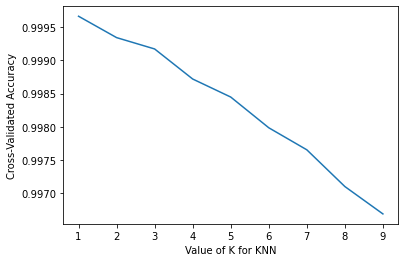

In [68]:
 #visualizing the above method
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 10)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, rescalX,Y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [69]:
#KNN with imbalced data
from sklearn.model_selection import LeaveOneOut,cross_val_score
model1 = KNeighborsClassifier(n_neighbors=2)
model1.fit(rescalX,Y_train)
y_pred2 = model1.predict(X_test_FselStd)
y_pred2_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred2})
print(confusion_matrix(Y_test,y_pred2))
print(accuracy_score(Y_test,y_pred2))
print(classification_report(Y_test,y_pred2))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred2_df.iloc[np.where(y_pred2_df['actual'] != y_pred2_df['predicted_prob'])]))
accuracy2= accuracy_score(Y_test,y_pred2)*100
precision2 = precision_score(Y_test,y_pred2, average='weighted')
recall2 = recall_score(Y_test,y_pred2,average='weighted')
f1_2 = f1_score(Y_test,y_pred2,average='weighted')
roc_auc_2= roc_auc_score(Y_test,model1.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
imbalData_model.loc[len(imbalData_model.index)] = ['KNN', accuracy2, precision2,recall2,f1_2,roc_auc_2]
imbalData_model

[[ 1048     1     0]
 [    3 40257     2]
 [    0     7  1195]]
0.9996942111824618
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       1.00      0.99      1.00      1202

    accuracy                           1.00     42513
   macro avg       1.00      1.00      1.00     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  13


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.875332,0.998787,0.998753,0.998763,0.996933
1,DecissionTree_Gini,99.969421,0.999697,0.999694,0.999695,0.999952
2,KNN,99.969421,0.999694,0.999694,0.999694,0.999119


In [70]:
#KNN grid search with balanced data
n_nbh = np.array(range(1,10))#considering the k value from 1 to 50
param_grid = dict(n_neighbors=n_nbh)#The dict() constructor builds dictionaries directly from sequences of key-value pairs
model1 = KNeighborsClassifier()
grid = GridSearchCV(estimator=model1, param_grid=param_grid)
grid_result = grid.fit(rescaledX,y_train_smote)
print(grid.best_score_)
print(grid.best_params_)

0.9998936941118911
{'n_neighbors': 1}


In [71]:
#KNN with balance data
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(rescaledX,y_train_smote)
y_pred2 = model1.predict(X_test_FselStd)
y_pred2_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred2})
print(confusion_matrix(Y_test,y_pred2))
print(accuracy_score(Y_test,y_pred2))
print(classification_report(Y_test,y_pred2))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred2_df.iloc[np.where(y_pred2_df['actual'] != y_pred2_df['predicted_prob'])]))
accuracy2= accuracy_score(Y_test,y_pred2)*100
precision2 = precision_score(Y_test,y_pred2, average='weighted')
recall2 = recall_score(Y_test,y_pred2,average='weighted')
f1_2 = f1_score(Y_test,y_pred2,average='weighted')
roc_auc_2= roc_auc_score(Y_test,model1.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
bal_model.loc[len(bal_model.index)] = ['KNN', accuracy2, precision2,recall2,f1_2,roc_auc_2]
bal_model

[[ 1048     1     0]
 [    0 40260     2]
 [    0     0  1202]]
0.9999294333497989
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       1.00      1.00      1.00      1202

    accuracy                           1.00     42513
   macro avg       1.00      1.00      1.00     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  3


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.891798,0.998958,0.998918,0.998928,0.999742
1,DecissionTree_Entropy,99.891798,0.998958,0.998918,0.998928,0.999941
2,KNN,99.992943,0.999930,0.999929,0.999929,0.999744


In [72]:
#Random Forest grid search with imbalced data
n_estimators = [200,300,250]
max_features = [4,5,6]
param_grid = dict(n_estimators = n_estimators,max_features =max_features)
model2 = RandomForestClassifier()
grid = GridSearchCV(estimator=model2, param_grid=param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(rescalX,Y_train)
print(grid.best_score_)
print(grid.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_features=4, n_estimators=200............................
[CV 1/5; 1/9] END max_features=4, n_estimators=200;, score=1.000 total time=  10.0s
[CV 2/5; 1/9] START max_features=4, n_estimators=200............................
[CV 2/5; 1/9] END max_features=4, n_estimators=200;, score=1.000 total time=  10.3s
[CV 3/5; 1/9] START max_features=4, n_estimators=200............................
[CV 3/5; 1/9] END max_features=4, n_estimators=200;, score=1.000 total time=  10.3s
[CV 4/5; 1/9] START max_features=4, n_estimators=200............................
[CV 4/5; 1/9] END max_features=4, n_estimators=200;, score=1.000 total time=  10.7s
[CV 5/5; 1/9] START max_features=4, n_estimators=200............................
[CV 5/5; 1/9] END max_features=4, n_estimators=200;, score=1.000 total time=  10.9s
[CV 1/5; 2/9] START max_features=4, n_estimators=300............................
[CV 1/5; 2/9] END max_features=4, 

In [73]:
#Random Forest with imbalced data
model2 = RandomForestClassifier(n_estimators=200,max_features=4)
model2.fit(rescalX,Y_train)
y_pred3 = model2.predict(X_test_FselStd)
y_pred3_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred3})
print(confusion_matrix(Y_test,y_pred3))
print(accuracy_score(Y_test,y_pred3))
print(classification_report(Y_test,y_pred3))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred3_df.iloc[np.where(y_pred3_df['actual'] != y_pred3_df['predicted_prob'])]))
accuracy3= accuracy_score(Y_test,y_pred3)*100
precision3 = precision_score(Y_test,y_pred3, average='weighted')
recall3 = recall_score(Y_test,y_pred3,average='weighted')
f1_3 = f1_score(Y_test,y_pred3,average='weighted')
roc_auc_3= roc_auc_score(Y_test,model2.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
imbalData_model.loc[len(imbalData_model.index)] = ['RandomForest', accuracy3, precision3,recall3,f1_3,roc_auc_3]
imbalData_model

[[ 1049     0     0]
 [    0 40262     0]
 [    0     1  1201]]
0.9999764777832663
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       1.00      1.00      1.00      1202

    accuracy                           1.00     42513
   macro avg       1.00      1.00      1.00     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  1


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.875332,0.998787,0.998753,0.998763,0.996933
1,DecissionTree_Gini,99.969421,0.999697,0.999694,0.999695,0.999952
2,KNN,99.969421,0.999694,0.999694,0.999694,0.999119
3,RandomForest,99.997648,0.999976,0.999976,0.999976,1.000000


In [74]:
#Random Forest grid search with BALANCED data
n_estimators = [400,300]
max_features = [3,4]
param_grid = dict(n_estimators = n_estimators,max_features =max_features)
model2 = RandomForestClassifier()
grid = GridSearchCV(estimator=model2, param_grid=param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(rescaledX,y_train_smote)
print(grid.best_score_)
print(grid.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START max_features=3, n_estimators=400............................
[CV 1/5; 1/4] END max_features=3, n_estimators=400;, score=1.000 total time=  57.1s
[CV 2/5; 1/4] START max_features=3, n_estimators=400............................
[CV 2/5; 1/4] END max_features=3, n_estimators=400;, score=1.000 total time= 1.0min
[CV 3/5; 1/4] START max_features=3, n_estimators=400............................
[CV 3/5; 1/4] END max_features=3, n_estimators=400;, score=1.000 total time= 1.1min
[CV 4/5; 1/4] START max_features=3, n_estimators=400............................
[CV 4/5; 1/4] END max_features=3, n_estimators=400;, score=1.000 total time= 1.1min
[CV 5/5; 1/4] START max_features=3, n_estimators=400............................
[CV 5/5; 1/4] END max_features=3, n_estimators=400;, score=1.000 total time= 1.0min
[CV 1/5; 2/4] START max_features=3, n_estimators=300............................
[CV 1/5; 2/4] END max_features=3, 

In [75]:
#Random Forest with balanced data
model2 = RandomForestClassifier(n_estimators=400,max_features=3)
model2.fit(rescaledX,y_train_smote)
y_pred3 = model2.predict(X_test_FselStd)
y_pred3_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred3})
print(confusion_matrix(Y_test,y_pred3))
print(accuracy_score(Y_test,y_pred3))
print(classification_report(Y_test,y_pred3))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred3_df.iloc[np.where(y_pred3_df['actual'] != y_pred3_df['predicted_prob'])]))
accuracy3= accuracy_score(Y_test,y_pred3)*100
precision3 = precision_score(Y_test,y_pred3, average='weighted')
recall3 = recall_score(Y_test,y_pred3,average='weighted')
f1_3 = f1_score(Y_test,y_pred3,average='weighted')
roc_auc_3= roc_auc_score(Y_test,model2.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
bal_model.loc[len(bal_model.index)] = ['RandomForest', accuracy3, precision3,recall3,f1_3,roc_auc_3]
bal_model

[[ 1049     0     0]
 [    0 40260     2]
 [    0     0  1202]]
0.9999529555665326
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       1.00      1.00      1.00      1202

    accuracy                           1.00     42513
   macro avg       1.00      1.00      1.00     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  2


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.891798,0.998958,0.998918,0.998928,0.999742
1,DecissionTree_Entropy,99.891798,0.998958,0.998918,0.998928,0.999941
2,KNN,99.992943,0.999930,0.999929,0.999929,0.999744
3,RandomForest,99.995296,0.999953,0.999953,0.999953,1.000000


In [76]:
#Bernoulli Naive Bayes : It assumes that all our features are binary such that they take only two values. Means 0s can represent 
#“word does not occur in the document” and 1s as "word occurs in the document" .

#Multinomial Naive Bayes : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent).
# In text learning we have the count of each word to predict the class or label.

#Gaussian Naive Bayes : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous

In [77]:
#Multinomial Naive Bayes with imbalced data
from sklearn.naive_bayes import MultinomialNB as MB
model4 =  MB()
model4.fit(rescalX,Y_train)
y_pred5 = model4.predict(X_test_FselStd)
y_pred5_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred5})
print(confusion_matrix(Y_test,y_pred5))
print(accuracy_score(Y_test,y_pred5))
print(classification_report(Y_test,y_pred5))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred5_df.iloc[np.where(y_pred5_df['actual'] != y_pred5_df['predicted_prob'])]))
accuracy5= accuracy_score(Y_test,y_pred5)*100
precision5 = precision_score(Y_test,y_pred5, average='weighted')
recall5 = recall_score(Y_test,y_pred5,average='weighted')
f1_5 = f1_score(Y_test,y_pred5,average='weighted')
roc_auc_5= roc_auc_score(Y_test,model4.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
imbalData_model.loc[len(imbalData_model.index)] = ['NaiveBayes', accuracy5, precision5,recall5,f1_5,roc_auc_5]
imbalData_model


[[    0  1049     0]
 [    0 40262     0]
 [    0  1202     0]]
0.9470514901324301
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1049
           2       0.95      1.00      0.97     40262
           3       0.00      0.00      0.00      1202

    accuracy                           0.95     42513
   macro avg       0.32      0.33      0.32     42513
weighted avg       0.90      0.95      0.92     42513

Total Test Count is 42513  
 Test failed count is -  2251


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.875332,0.998787,0.998753,0.998763,0.996933
1,DecissionTree_Gini,99.969421,0.999697,0.999694,0.999695,0.999952
2,KNN,99.969421,0.999694,0.999694,0.999694,0.999119
3,RandomForest,99.997648,0.999976,0.999976,0.999976,1.000000
4,NaiveBayes,94.705149,0.896907,0.947051,0.921297,0.867063


In [78]:
#Multinomial Naive Bayes with balanced data
model4 =  MB()
model4.fit(rescaledX,y_train_smote)
y_pred5 = model4.predict(X_test_FselStd)
y_pred5_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred5})
print(confusion_matrix(Y_test,y_pred5))
print(accuracy_score(Y_test,y_pred5))
print(classification_report(Y_test,y_pred5))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred5_df.iloc[np.where(y_pred5_df['actual'] != y_pred5_df['predicted_prob'])]))
accuracy5= accuracy_score(Y_test,y_pred5)*100
precision5 = precision_score(Y_test,y_pred5, average='weighted')
recall5 = recall_score(Y_test,y_pred5,average='weighted')
f1_5 = f1_score(Y_test,y_pred5,average='weighted')
roc_auc_5= roc_auc_score(Y_test,model4.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
bal_model.loc[len(bal_model.index)] = ['NaiveBayes', accuracy5, precision5,recall5,f1_5,roc_auc_5]
bal_model

[[  742   262    45]
 [ 1047 30749  8466]
 [    2   188  1012]]
0.7645426104956131
              precision    recall  f1-score   support

           1       0.41      0.71      0.52      1049
           2       0.99      0.76      0.86     40262
           3       0.11      0.84      0.19      1202

    accuracy                           0.76     42513
   macro avg       0.50      0.77      0.52     42513
weighted avg       0.95      0.76      0.83     42513

Total Test Count is 42513  
 Test failed count is -  10010


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.891798,0.998958,0.998918,0.998928,0.999742
1,DecissionTree_Entropy,99.891798,0.998958,0.998918,0.998928,0.999941
2,KNN,99.992943,0.999930,0.999929,0.999929,0.999744
3,RandomForest,99.995296,0.999953,0.999953,0.999953,1.000000
4,NaiveBayes,76.454261,0.946619,0.764543,0.833244,0.875918


In [79]:
#SVM grid search with imbalced data
from sklearn import svm
from sklearn.svm import SVC #suypport vector classifier
kernel = ['rbf']
gamma = [5,10,0.5]
C = [10,0.5,0.001]
param_grid = dict(kernel = kernel,gamma =gamma, C=C)
model3 = SVC()
grid = GridSearchCV(estimator=model3, param_grid=param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(rescalX,Y_train)
print(grid.best_score_)
print(grid.best_params_)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START C=10, gamma=5, kernel=rbf...................................
[CV 1/5; 1/9] END ....C=10, gamma=5, kernel=rbf;, score=1.000 total time=  27.5s
[CV 2/5; 1/9] START C=10, gamma=5, kernel=rbf...................................
[CV 2/5; 1/9] END ....C=10, gamma=5, kernel=rbf;, score=1.000 total time=  29.6s
[CV 3/5; 1/9] START C=10, gamma=5, kernel=rbf...................................
[CV 3/5; 1/9] END ....C=10, gamma=5, kernel=rbf;, score=1.000 total time=  26.8s
[CV 4/5; 1/9] START C=10, gamma=5, kernel=rbf...................................
[CV 4/5; 1/9] END ....C=10, gamma=5, kernel=rbf;, score=1.000 total time=  27.0s
[CV 5/5; 1/9] START C=10, gamma=5, kernel=rbf...................................
[CV 5/5; 1/9] END ....C=10, gamma=5, kernel=rbf;, score=1.000 total time=  27.3s
[CV 1/5; 2/9] START C=10, gamma=10, kernel=rbf..................................
[CV 1/5; 2/9] END ...C=10, gamma=10, kernel=rbf;,

In [80]:
#SVM with imbalced data
model3 = SVC(kernel = 'rbf',gamma=5,C=10,probability=True)
model3.fit(rescalX,Y_train)
y_pred4 = model3.predict(X_test_FselStd)
y_pred4_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred4})
print(confusion_matrix(Y_test,y_pred4))
print(accuracy_score(Y_test,y_pred4))
print(classification_report(Y_test,y_pred4))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred4_df.iloc[np.where(y_pred4_df['actual'] != y_pred4_df['predicted_prob'])]))
accuracy4= accuracy_score(Y_test,y_pred4)*100
precision4 = precision_score(Y_test,y_pred4, average='weighted')
recall4 = recall_score(Y_test,y_pred4,average='weighted')
f1_4 = f1_score(Y_test,y_pred4,average='weighted')
roc_auc_4= roc_auc_score(Y_test,model3.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
imbalData_model.loc[len(imbalData_model.index)] = ['SVM', accuracy4, precision4,recall4,f1_4,roc_auc_4]
imbalData_model

[[ 1049     0     0]
 [    0 40262     0]
 [    0     1  1201]]
0.9999764777832663
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       1.00      1.00      1.00      1202

    accuracy                           1.00     42513
   macro avg       1.00      1.00      1.00     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  1


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.875332,0.998787,0.998753,0.998763,0.996933
1,DecissionTree_Gini,99.969421,0.999697,0.999694,0.999695,0.999952
2,KNN,99.969421,0.999694,0.999694,0.999694,0.999119
3,RandomForest,99.997648,0.999976,0.999976,0.999976,1.000000
4,NaiveBayes,94.705149,0.896907,0.947051,0.921297,0.867063
5,SVM,99.997648,0.999976,0.999976,0.999976,1.000000


In [81]:
#SVM grid search with balanced data
kernel = ['rbf']
gamma = [5,10]
C = [10,15]
param_grid = dict(kernel = kernel,gamma =gamma, C=C)
model3 = SVC()
grid = GridSearchCV(estimator=model3, param_grid=param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(rescaledX,y_train_smote)
print(grid.best_score_)
print(grid.best_params_)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START C=10, gamma=5, kernel=rbf...................................
[CV 1/5; 1/4] END ....C=10, gamma=5, kernel=rbf;, score=1.000 total time=14.4min
[CV 2/5; 1/4] START C=10, gamma=5, kernel=rbf...................................
[CV 2/5; 1/4] END ....C=10, gamma=5, kernel=rbf;, score=1.000 total time= 8.8min
[CV 3/5; 1/4] START C=10, gamma=5, kernel=rbf...................................
[CV 3/5; 1/4] END ....C=10, gamma=5, kernel=rbf;, score=1.000 total time= 5.4min
[CV 4/5; 1/4] START C=10, gamma=5, kernel=rbf...................................
[CV 4/5; 1/4] END ....C=10, gamma=5, kernel=rbf;, score=0.999 total time= 8.4min
[CV 5/5; 1/4] START C=10, gamma=5, kernel=rbf...................................
[CV 5/5; 1/4] END ....C=10, gamma=5, kernel=rbf;, score=0.999 total time= 1.4min
[CV 1/5; 2/4] START C=10, gamma=10, kernel=rbf..................................
[CV 1/5; 2/4] END ...C=10, gamma=10, kernel=rbf;,

In [82]:
#SVM with Balanced data
model3 = SVC(kernel = 'rbf',gamma=5,C=15,probability=True)
model3.fit(rescaledX,y_train_smote)
y_pred4 = model3.predict(X_test_FselStd)
y_pred4_df= pd.DataFrame({'actual': Y_test,
                         'predicted_prob': y_pred4})
print(confusion_matrix(Y_test,y_pred4))
print(accuracy_score(Y_test,y_pred4))
print(classification_report(Y_test,y_pred4))
print('Total Test Count is', len(X_test_FselStd),' \n Test failed count is - ',len(y_pred4_df.iloc[np.where(y_pred4_df['actual'] != y_pred4_df['predicted_prob'])]))
accuracy4= accuracy_score(Y_test,y_pred4)*100
precision4 = precision_score(Y_test,y_pred4, average='weighted')
recall4 = recall_score(Y_test,y_pred4,average='weighted')
f1_4 = f1_score(Y_test,y_pred4,average='weighted')
roc_auc_4= roc_auc_score(Y_test,model3.predict_proba(X_test_FselStd),average = 'weighted',multi_class='ovo')#As we have target variable as multiclass(not multilabel )
bal_model.loc[len(bal_model.index)] = ['SVM', accuracy4, precision4,recall4,f1_4,roc_auc_4]
bal_model

[[ 1049     0     0]
 [    0 40255     7]
 [    0     0  1202]]
0.999835344482864
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1049
           2       1.00      1.00      1.00     40262
           3       0.99      1.00      1.00      1202

    accuracy                           1.00     42513
   macro avg       1.00      1.00      1.00     42513
weighted avg       1.00      1.00      1.00     42513

Total Test Count is 42513  
 Test failed count is -  7


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.891798,0.998958,0.998918,0.998928,0.999742
1,DecissionTree_Entropy,99.891798,0.998958,0.998918,0.998928,0.999941
2,KNN,99.992943,0.999930,0.999929,0.999929,0.999744
3,RandomForest,99.995296,0.999953,0.999953,0.999953,1.000000
4,NaiveBayes,76.454261,0.946619,0.764543,0.833244,0.875918
5,SVM,99.983534,0.999836,0.999835,0.999836,0.999987


In [83]:
#Data frame with accurancy,f1 score, precission,recall and other parameters for the imbalaced data
imbalData_model


,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.875332,0.998787,0.998753,0.998763,0.996933
1,DecissionTree_Gini,99.969421,0.999697,0.999694,0.999695,0.999952
2,KNN,99.969421,0.999694,0.999694,0.999694,0.999119
3,RandomForest,99.997648,0.999976,0.999976,0.999976,1.000000
4,NaiveBayes,94.705149,0.896907,0.947051,0.921297,0.867063
5,SVM,99.997648,0.999976,0.999976,0.999976,1.000000


In [84]:
#Data frame with accurancy,f1 score, precission,recall  and other parameters for the balanced data
bal_model

,Model_Name,accuracy,precision_Score,recall_Score,f1_score,roc_auc_score
0,LogisticRegrs,99.891798,0.998958,0.998918,0.998928,0.999742
1,DecissionTree_Entropy,99.891798,0.998958,0.998918,0.998928,0.999941
2,KNN,99.992943,0.999930,0.999929,0.999929,0.999744
3,RandomForest,99.995296,0.999953,0.999953,0.999953,1.000000
4,NaiveBayes,76.454261,0.946619,0.764543,0.833244,0.875918
5,SVM,99.983534,0.999836,0.999835,0.999836,0.999987


In [85]:
#Selecting RandomForest model because of the hich accuracy,precision,recall,f1_score and high roc_auc_score compared to other models